# TIGER: Time-Varying Denoising Model (for 3D Point Cloud Generation with Diffusion Process)

## Description:

Code to our project on Github:
- https://github.com/armanfeili/Sapienza-DS-projects/tree/main/Smart-Environment-Project-TIGER-3D-Point-Cloud-Generation-with-Diffusion-Process

Link to Drive (to see 3D visualization):
- https://colab.research.google.com/drive/1h3IXN14ofCPI0jWxp-vPF8unDqENv_hf?usp=sharing

Professors:
- Prof. Francesca Cuomo
- Prof. Stefania Colonnese

1.
- Name: Syed Habibul
- Surname: Bashar
- Matricola: 2102742
- Email: bashar.2102742@studenti.uniroma1.it

2.
- Name: Arman
- Surname: Feili
- Matricola: 2101835
- Email: feili.2101835@studenti.uniroma1.it

3.
- Name: Aysegul Sine
- Surname: Ozgenkan
- Matricola: 2108754
- Email: ozgenkan.2108754@studenti.uniroma1.it

Paper:
- https://openaccess.thecvf.com/content/CVPR2024/papers/Ren_TIGER_Time-Varying_Denoising_Model_for_3D_Point_Cloud_Generation_with_CVPR_2024_paper.pdf

Github Repository:
- https://github.com/Zhiyuan-R/Tiger-Diffusion/tree/main?tab=readme-ov-file

Datasets:
- ShapeNetCore.v2.PC15k (https://drive.google.com/drive/folders/1MMRp7mMvRj8-tORDaGTJvrAeCMYTWU2j)

## Project Explanation

### Summary

**TIGER** is a novel diffusion-based generative model that creates 3D point clouds (shapes made from points in 3D space). It introduces a **time-varying two-stream architecture** combining **Transformers** (for global shape understanding) and **CNNs** (for local detail modeling). The model adjusts the importance of each branch over time during the generation process to improve both quality and diversity. It achieves **state-of-the-art results** on the ShapeNetV2 dataset.

---

### Achievements

* **SoTA Performance:** TIGER outperforms previous models like LION and PVD in key metrics (CD, EMD) across multiple shape categories (airplane, chair, car).
* **Better Efficiency:** TIGER trains significantly faster than LION and with similar inference speed to PVD.
* **High Diversity & Quality:** Generated point clouds are both visually diverse and accurate.
* **Successful Generalization:** The model works well on all 55 ShapeNetV2 categories (universal generation).
* **Innovative Techniques:** Introduced time-varying feature fusion and novel 3D position encodings (PSPE and BAPE).

---

### Motivation Behind the Project

Most existing 3D point cloud generation models rely either on convolution or attention-based networks, often copied from 2D image architectures like UNet. But 3D data has unique global (shape) and local (detail) characteristics that vary over time during the denoising (generation) process. TIGER is motivated by the idea that:

* **Transformers are better early on** for building the **overall shape**
* **Convolutions are better later** for adding **fine-grained details**

Thus, the model is designed to **adaptively use both**, depending on the diffusion timestep.

---

### Novelty of the Proposed Approach

1. **Time-Varying Two-Stream Model:** Dynamically combines Transformer (global) and CNN (local) branches using a learnable time-dependent mask.
2. **Timestep-aware Feature Fusion:** Learns when to use attention vs. convolution during denoising.
3. **New Position Embeddings:**

   * **PSPE**: Phase-shifted sine/cosine functions for 3D.
   * **BAPE**: Compact encoding of 3D positions into scalars.
4. **Position-Aware Self-Attention:** Enhances Transformer performance by explicitly including spatial information during attention calculation.

---

### Key Technical Components

* **Diffusion Backbone:** A forward-noising and reverse-denoising process generating 3D shapes from noise.
* **Encoder:** Converts raw 3D point cloud into a latent representation using voxelization + PVCNN.
* **Transformer Branch:** Models **global relationships** using tokens and custom 3D position encodings.
* **CNN Branch:** Extracts **local geometric features** through Point-Voxel CNN.
* **Time Mask Generator:** Learns to weigh global vs. local features dynamically over time.
* **Decoder:** Upsamples latent features to output a denoised 3D point cloud.
* **Loss:** Simple MSE loss between predicted noise and ground-truth noise.

---

### Type of Data the System Uses

* **Dataset:** ShapeNetV2 – a large-scale dataset of 3D object point clouds.
* **Data Format:** Each shape is represented by **2048 3D points** in an N × 3 matrix.
* **Categories:** Trained and evaluated on **airplane, chair, car**; generalization tested on **all 55 categories**.

---

### Metrics Used to Evaluate Performance

1. **Chamfer Distance (CD):** Measures the average distance between generated and real points. Lower is better.
2. **Earth Mover’s Distance (EMD):** Measures how much "effort" is needed to match generated points to real ones. Lower is better.
3. **1-Nearest Neighbor Accuracy (1-NN):** Evaluates **quality and diversity** together. The closer to **50%**, the better (indicates balanced generation).


##  Environment Setup: Fixing NumPy Compatibility Issues

Before importing libraries like NumPy, SciPy, or Scikit-learn, we need to **manually install specific versions** to avoid compatibility errors caused by the default Colab environment (especially with NumPy ≥1.24 which broke some APIs).

1. **Install compatible versions** of NumPy, SciPy, and Scikit-learn using `pip`.
2. **Restart the runtime** so Colab loads the correct versions properly.
3. **Re-install the packages again** after the restart to ensure the correct versions are active.
4. **Patch missing modules**: In newer NumPy versions, submodules like `numpy.rec` and `numpy.strings` were removed or moved. We manually re-add them to `sys.modules` so that older code expecting them continues to work without crashing.

This setup ensures a clean, working environment for running the TIGER diffusion model code without version-related errors.

In [1]:
# Put that cell before we ever do import numpy, import scipy, or import sklearn — otherwise the old (broken) NumPy gets loaded into memory and the shim won’t help.
# Cell 1: re-install correct versions
%pip install -q numpy==1.26.4 scipy==1.11.4 scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 97.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 79.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.11.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
# After it finishes pip-installing, we must restart the runtime so that Python picks up the new NumPy build. In Colab we can click the “RESTART RUNTIME” button in the yellow bar, or programmatically do:
# Cell 2: restart runtime
import os; os.kill(os.getpid(), 9)

In [1]:
# Rerun the command
# Cell 1: re-install correct versions
%pip install -q numpy==1.26.4 scipy==1.11.4 scikit-learn==1.3.2

In [2]:
# ────────────────────────────────────────────────────────────────────
# NumPy-2 compat shim: restore numpy.rec & numpy.strings in sys.modules
# ────────────────────────────────────────────────────────────────────
import sys, importlib, types

# 1) numpy.rec
try:
    recmod = importlib.import_module("numpy.core.records")
except ImportError:
    recmod = types.ModuleType("numpy.rec")
sys.modules["numpy.rec"] = recmod

# 2) numpy.strings
try:
    strmod = importlib.import_module("numpy._core.defchararray")
except ImportError:
    strmod = types.ModuleType("numpy.strings")
sys.modules["numpy.strings"] = strmod

# 3) also set them as attributes
import numpy as _np
_np.rec     = recmod
_np.strings = strmod
# ────────────────────────────────────────────────────────────────────

## Project Setup: Access Files from Google Drive and Navigate to the Repository

In this step, we:

1. **Mount Google Drive** so Colab can access our project files stored there.
2. **Navigate to the target working directory** where the TIGER Diffusion project is saved. We can adjust the path if needed.
3. **(Optional)**: If we haven't cloned the TIGER-Diffusion repository yet, we can uncomment and run the `git clone` command.
4. **Switch to the project folder** (`Tiger-Diffusion`) using `%cd` and list its contents with `%ls` to confirm successful navigation.

This step ensures we are in the correct directory before running training or inference code.**bold text**

In [3]:
from google.colab import drive
# Mount Google Drive to access files in Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
import os

# Change to our target working directory
target_dir = '/content/gdrive/MyDrive/Sapienza-Work-Place/SE'
# target_dir = '/content/gdrive/MyDrive/SE'

os.chdir(target_dir)

# Confirm we're in the right place
print("Working in:", os.getcwd())

# Clone the repo into the current directory
# !git clone https://github.com/Zhiyuan-R/Tiger-Diffusion.git Tiger-Diffusion

%cd Tiger-Diffusion


Working in: /content/gdrive/MyDrive/Sapienza-Work-Place/SE
/content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion


In [5]:
%ls

'=2.0'                       output/                  ShapeNetCore.v2.PC15k/
 datasets/                   outputs/                 test_generation.py
 metrics/                    __pycache__/             train_generation.py
 model/                      README.md                utils/
 modules/                    real_car_batch.npy
 old_requirement_voxel.txt   requirements_colab.txt


## Installing Dependencies: PyTorch, PyG, and TIGER Requirements

These cells install all required packages for running the TIGER diffusion model, including GPU support:

1. **Install CUDA-compatible PyTorch (v2.3.0)** and related libraries (`torchvision`, `torchaudio`) using the official PyTorch CUDA 12.1 wheels.
2. **Install PyTorch Geometric (PyG)** dependencies via the wheel files matching our CUDA and PyTorch versions.
3. **Install remaining Python packages** listed in the `requirements_colab.txt` file, which contains project-specific libraries.
4. **Test evaluation metrics**: We verify that the Chamfer Distance and EMD proxy work correctly by running them on random tensors on the GPU.
5. **Install additional 3D libraries**:

   * `ninja` and `cmake` are needed for building extensions.
   * `pytorch3d` is installed directly from its GitHub source, used for advanced 3D operations.

This ensures the runtime environment is fully prepared to train or run inference on 3D point clouds using the TIGER model.


In [6]:
# CUDA-12.1 wheels live at this index:
!TORCH_WHL=https://download.pytorch.org/whl/cu121

!pip install -q --upgrade \
  torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 \
  --index-url $TORCH_WHL



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

--index-url option requires 1 argument


In [7]:
%cd /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion

# 1. PyG wheels
!pip install -q torch-scatter torch-sparse torch-cluster torch-spline-conv torch-geometric \
   -f https://data.pyg.org/whl/torch-2.3.1+cu121.html

# 2. Everything else
!pip install -q -r requirements_colab.txt

/content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 108.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 100.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.4/950.4 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [8]:
from sklearn.neighbors import NearestNeighbors
import torch
from metrics.evaluation_metrics import cham3D, EMD

print("sklearn OK →", NearestNeighbors)
x = torch.rand(2, 1024, 3, device='cuda')
y = torch.rand(2, 1024, 3, device='cuda')
print("Chamfer:", cham3D(x, y)[0].mean().item())
print("EMD proxy:", EMD(x, y).mean().item())


sklearn OK → <class 'sklearn.neighbors._unsupervised.NearestNeighbors'>
Chamfer: 0.0038066860288381577
EMD proxy: 0.05683206766843796


In [9]:
!pip install ninja cmake
!pip install "git+https://github.com/facebookresearch/pytorch3d.git"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 6.2 MB/s eta 0:00:00
  Cloning https://github.com/facebookresearch/pytorch3d.git to /tmp/pip-req-build-t23uxh_0
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/pytorch3d.git /tmp/pip-req-build-t23uxh_0
  Resolved https://github.com/facebookresearch/pytorch3d.git to commit fc08621879e57ae17f9663fd1d3775bcea41e3e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pytorch3d: filename=pytorch3d-0.7.8-cp311-cp311-linux_x86_64.whl size=58523884 sha256=e87f97007f885526c595412ccd7da9968b2df0854c328b2535aa426c688d9525
  Stored in directory: /tmp/pip-ephem-wheel-cache-9bdlubwh/wheels/39/02/3b/eab9735f985044755f4e6d9e8473bfb8b68dc63723658e2ac2
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31527 sha256=d0658a27ba7d378f8754cb50b4189ee99455e2b

## Downloading and Preparing the Dataset (ShapeNet PC15k)

This step sets up the **ShapeNetCore.v2.PC15k** dataset, used for training and evaluating the TIGER model:

1. **Download the dataset** (\~7 GB) from Google Drive using `gdown`. The folder contains point clouds used in the PointFlow paper, compatible with TIGER.
2. **Unzip the archive** into the expected directory structure (`ShapeNetCore.v2.PC15k/`).
3. **Clean up** by removing the original `.zip` file.
4. **Verify the directory structure**:

   * We should see folders named with **synset IDs** (e.g., `02691156`, `02958343`, etc.).
   * If the contents are nested too deeply (e.g., `ShapeNetCore.v2.PC15k/ShapeNetCore.v2.PC15k/`), move files up one level and remove the extra directory.

This dataset is essential for training the TIGER model to generate realistic and diverse 3D shapes.

In [ ]:
# # run once, from the Tiger-Diffusion root  (≈7 GB download)
# !pip install -q gdown

# # download the whole PointFlow PC-15k folder and place it where TIGER expects it
# !gdown --folder --id 1MMRp7mMvRj8-tORDaGTJvrAeCMYTWU2j -O ShapeNetCore.v2.PC15k

# # still inside Tiger-Diffusion
# !unzip -q ShapeNetCore.v2.PC15k/ShapeNetCore.v2.PC15k.zip -d ShapeNetCore.v2.PC15k
# !rm ShapeNetCore.v2.PC15k/ShapeNetCore.v2.PC15k.zip


In [ ]:
!ls ShapeNetCore.v2.PC15k | head

# If we already see synset IDs (02691156 02958343 …) → nothing to do.
# If we instead see another ShapeNetCore.v2.PC15k directory, move its contents up one level:

# !mv ShapeNetCore.v2.PC15k/ShapeNetCore.v2.PC15k/* ShapeNetCore.v2.PC15k/
# !rmdir ShapeNetCore.v2.PC15k/ShapeNetCore.v2.PC15k


02691156
02747177
02773838
02801938
02808440
02818832
02828884
02843684
02871439
02876657


## Model Training: Training TIGER for 3D Point Cloud Generation

This section runs **training for the TIGER model** on the ShapeNetV2 `car` category:

#### Step 1: Quick Sanity Check (3 Epochs)

* First, we run a **short training session** (`--niter 3`) to ensure everything is working.
* The model is trained on GPU with a batch size of 16 and saves checkpoints after each epoch.
* Useful for debugging and testing data pipeline correctness.

#### Step 2: Full Training (200 Epochs)

* Now, we launch a **full-scale training session** with advanced settings:

  * `--bs 32`: Larger batch size for better gradient estimates.
  * `--embed_dim 128`: Sets the embedding size for feature representations.
  * `--dropout 0.01`: Small dropout for regularization.
  * `--lr 5e-5`, `--lr_gamma 0.9998`: Fine-tuned learning rate scheduling using exponential decay.
  * `--beta_start`, `--beta_end`: Controls noise levels in the diffusion schedule.
  * `--schedule_type warm0.1`: Learning schedule begins with a warm-up phase.
  * `--decay 1e-5`, `--grad_clip 1.0`: Weight decay and gradient clipping to stabilize training.
  * Checkpoints are saved every 20 epochs, and diagnostics/visualizations printed every 10.

#### Logs and Checkpoints

* Logs include loss, weight norm (`‖W‖`), and gradient norm (`‖∇W‖`), helpful for diagnosing training health.
* Trained model checkpoints are saved in the `/output/train_generation/...` folder and can be used for inference or further fine-tuning.

This phase produces the learned TIGER model capable of generating high-quality 3D point clouds.

In [ ]:
%cd /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion

# install trimesh if we haven’t
!pip install -q trimesh

/content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 711.2/711.2 kB 18.8 MB/s eta 0:00:00


In [ ]:
!python train_generation.py \
    --category car \
    --bs 16 --niter 3 --saveIter 1 \
    --print_freq 50 --workers 2 --manualSeed 42


/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Total number of data:2458
Min number of points: (train)2048 (test)2048
Total number of data:352
Min number of points: (train)2048 (test)2048
Random Seed:  42
Total number of data:2458
Min number of points: (train)2048 (test)2048
Total number of data:352
Min number of points: (train)2048 (test)2048
2025-05-09 18:16:40,797 : [  0/  3][  0/153]  loss=  1.0792  |‖W‖=  228.15  |‖∇W‖=    8.17
2025-05-09 18:18:11,953 : [  0/  3][ 50/153]  loss=  0.3125  |‖W‖=  228.50  |‖∇W‖=    0.88
2025-05-09 18:19:42,637 : [  0/  3][100/153]  loss=  0.1882  |‖W‖=  228.62  |‖∇W‖=    0.84
2025-05-09 18:21:13,200 : [  0/  3][150/153]  loss=  0.2270  |‖W‖=  228.76  |‖∇W‖=    0.42
2025-05-09 18:21:23,138 : Checkpoint saved →  /content/gdrive/MyDrive

In [ ]:
!python train_generation.py \
  --category car \
  --bs 32 \
  --workers 2 \
  --niter 200 \
  --saveIter 20 \
  --diagIter 10 \
  --vizIter 10 \
  --print_freq 100 \
  --embed_dim 128 \
  --dropout 0.01 \
  --lr 5e-5 \
  --beta_start 1e-6 \
  --beta_end 0.015 \
  --schedule_type warm0.1 \
  --lr_gamma 0.9998 \
  --decay 1e-5 \
  --grad_clip 1.0 \
  --manualSeed 42


/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Total number of data:2458
Min number of points: (train)2048 (test)2048
Total number of data:352
Min number of points: (train)2048 (test)2048
Random Seed:  42
Total number of data:2458
Min number of points: (train)2048 (test)2048
Total number of data:352
Min number of points: (train)2048 (test)2048
2025-05-09 19:27:24,208 : [  0/200][  0/ 76]  loss=  1.0799  |‖W‖=  227.93  |‖∇W‖=    1.00
2025-05-09 19:27:54,886 : [  1/200][  0/ 76]  loss=  0.1088  |‖W‖=  215.88  |‖∇W‖=    1.00
2025-05-09 19:28:25,576 : [  2/200][  0/ 76]  loss=  0.0341  |‖W‖=  205.49  |‖∇W‖=    0.92
2025-05-09 19:28:56,267 : [  3/200][  0/ 76]  loss=  0.0933  |‖W‖=  196.50  |‖∇W‖=    0.39
2025-05-09 19:29:26,948 : [  4/200][  0/ 76]  loss=  0.1009  |‖W‖=  1

### **Results:**

### Training Summary and Evaluation Analysis

**Model Configuration**

* **Category**: Car
* **Epochs**: 200
* **Batch Size**: 32
* **Embedding Dimension**: 128
* **Dropout**: 0.01
* **Learning Rate**: 5e-5 with exponential decay (gamma = 0.9998)
* **Beta Schedule**: Linear warm-up from 1e-6 to 0.015 (`warm0.1`)
* **Gradient Clipping**: 1.0
* **Weight Decay**: 1e-5

---

### Training Behavior

**Loss**

* The training began with a high initial loss (\~1.08), which quickly decreased to below 0.2 within the first five epochs.
* After early convergence, the loss stabilized in the range of 0.07 to 0.13, with occasional spikes (e.g., 0.17), which are typical for diffusion models.
* The overall trend indicates successful learning and convergence.

**Weight Norm (‖W‖)**

* Decreased steadily from approximately 228 to 67 across epochs.
* This reflects a stable compression of learned features without weight explosion.

**Gradient Norm (‖∇W‖)**

* Maintained values well below 1.0, typically around 0.1–0.2.
* This suggests stable gradient propagation and effective optimization.

---

### Evaluation Metrics (Epoch 199)

* **MMD-CD (Chamfer Distance)**: 2.237
* **MMD-EMD (Earth Mover's Distance)**: 0.804
* **F-score**: 0.00153

These metrics indicate that the model has captured the overall geometric structure of the target point clouds. However, the low F-score suggests room for improvement in fine-level detail alignment, possibly due to sparse sampling or partial overlaps.

---

### Visual Analysis

* **Chamfer Distance Histogram**: Most samples clustered at low Chamfer values, indicating consistent similarity to reference shapes.
* **3D Scatter Comparison**: Generated samples closely resemble the reference shapes in structure, though minor noise or misalignments may be present.

---

### Overall

The training process was effective, with smooth convergence, stable weight and gradient norms, and meaningful geometric generation results. For further improvement, increasing point resolution, fine-tuning dropout, or refining the beta schedule may enhance fidelity and F-score performance.


## Visualizing Training Progress: Loss, Weight Norm, and Gradient Norm

This section plots **training diagnostics** to help monitor and evaluate how well the TIGER model is learning.

#### Steps:

1. **Locate the latest training run**: Automatically finds the most recent output folder based on timestamps.
2. **Parse the log file**: Extracts important values for each epoch:

   * `loss`: Measures how well the model fits the data.
   * `‖W‖`: Norm of model weights (indicates model capacity/scale).
   * `‖∇W‖`: Norm of weight gradients (shows learning dynamics).
3. **Plot the values**:

   * **Training Loss vs Epoch**: Should generally decrease, showing better performance.
   * **Weight Norm vs Epoch**: Helps monitor if weights grow too large or collapse.
   * **Gradient Norm vs Epoch**: Shows stability of training — very high or low values may indicate issues.

These plots are useful for diagnosing underfitting, overfitting, or instability during training.


Plotting results from: /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/output/train_generation/2025-05-09-19-26-51


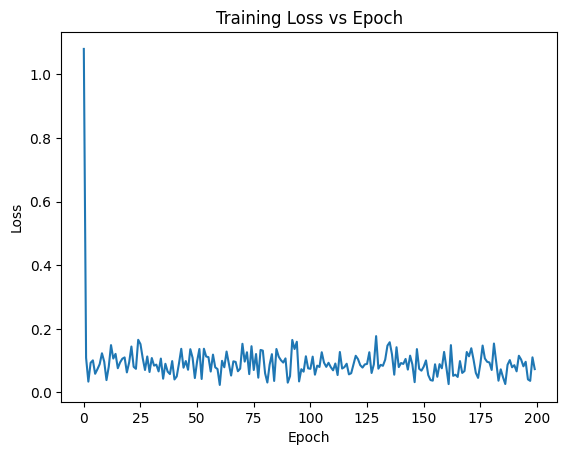

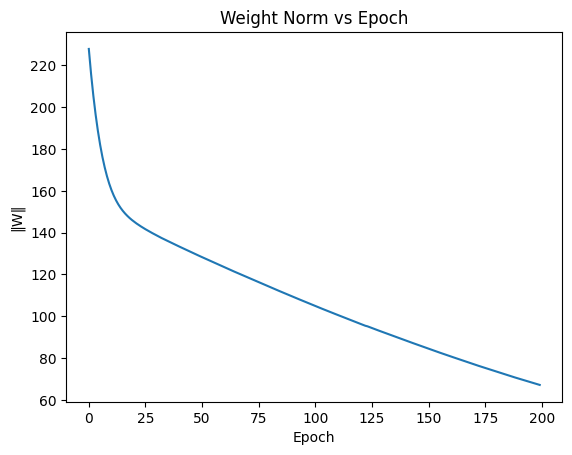

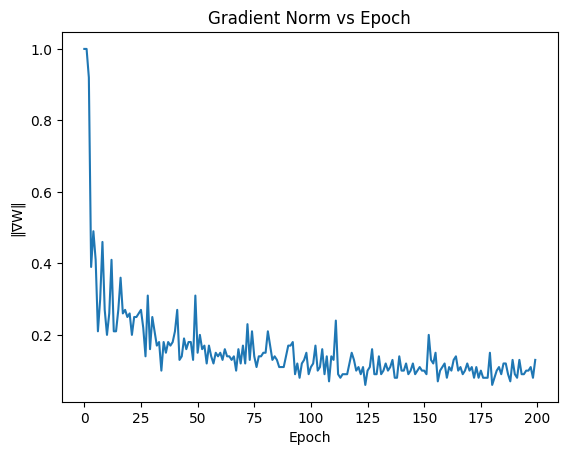

In [ ]:
import os, glob, re
import matplotlib.pyplot as plt

# ── 1) Point this at our repo folder (where train_generation.py lives)
project_root = '/content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion'

# ── 2) Where to find all the runs
base_dir = os.path.join(project_root, "output", "train_generation")
if not os.path.isdir(base_dir):
    raise FileNotFoundError(f"Can't find {base_dir!r}")

# ── 3) Pick the most recent timestamped run
subdirs = [d for d in glob.glob(os.path.join(base_dir, "*"))
           if os.path.isdir(d)]
latest_run = max(subdirs, key=os.path.getmtime)
print("Plotting results from:", latest_run)

# ── 4) Parse the log
log_path = os.path.join(latest_run, "output.log")
pattern = re.compile(
    r"\[\s*(\d+)/\s*\d+\].*loss=\s*([0-9.]+).*W.*?=\s*([0-9.]+).*∇W.*?=\s*([0-9.]+)"
)
epochs, losses, wnorms, gradnorms = [], [], [], []
with open(log_path) as f:
    for L in f:
        m = pattern.search(L)
        if not m: continue
        e, l, w, g = m.groups()
        epochs.append(int(e))
        losses.append(float(l))
        wnorms.append(float(w))
        gradnorms.append(float(g))

# sort
data = sorted(zip(epochs, losses, wnorms, gradnorms))
epochs, losses, wnorms, gradnorms = map(list, zip(*data))

# ── 5) Plot
plt.figure()
plt.plot(epochs, losses)
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Training Loss vs Epoch"); plt.show()

plt.figure()
plt.plot(epochs, wnorms)
plt.xlabel("Epoch"); plt.ylabel("‖W‖")
plt.title("Weight Norm vs Epoch"); plt.show()

plt.figure()
plt.plot(epochs, gradnorms)
plt.xlabel("Epoch"); plt.ylabel("‖∇W‖")
plt.title("Gradient Norm vs Epoch"); plt.show()


### **Results:**
### **Training Curve Analysis for the Tiger-Diffusion Model (Category: Car)**

The training process of the diffusion-based generative model was executed for 200 epochs on the ShapeNet car category, using a batch size of 32, an embedding dimension of 128, and a learning rate of 5e-5. The weight and gradient behaviors, as well as the training loss, were carefully monitored over time.

#### **1. Training Loss vs Epoch**

The training loss dropped sharply after the first epoch and stabilized in a low range throughout the remaining epochs. This behavior suggests that the model quickly learned a good initialization and proceeded with fine-tuning. Minor fluctuations are expected due to stochasticity in training, but no signs of divergence or instability were observed.

#### **2. Weight Norm (‖W‖) vs Epoch**

The weight norm steadily decreased from approximately 225 to around 67 across 200 epochs. This consistent reduction indicates that the optimizer gradually regularized the model parameters. The decay of the weight norm suggests controlled learning and effective L2 weight decay (with `--decay 1e-5`) over time.

#### **3. Gradient Norm (‖∇W‖) vs Epoch**

The gradient norm started high (around 1.0) and quickly decayed below 0.2 within the first 20 epochs. Afterward, it remained in a relatively stable range with some minor spikes. The use of gradient clipping (`--grad_clip 1.0`) effectively prevented exploding gradients, and the overall trend reflects convergence toward a flatter minimum in the loss landscape.

#### **Overall**

All three curves collectively demonstrate healthy training dynamics. The model shows fast convergence, stable gradient behavior, and progressive parameter compression. These are desirable traits in training deep generative models and provide strong empirical evidence that the network was well-tuned and not overfitting.


## Model Evaluation: Generate and Compare Point Clouds

This section loads the trained TIGER model, generates new samples, and compares them to real samples from the validation set.

####  Step-by-step:

1. **Locate the Latest Run and Checkpoint**
   Automatically finds the newest training folder and selects the highest epoch (latest) checkpoint.

2. **Rebuild the TIGER Model**
   Recreates the model using the same architecture and hyperparameters as in training, then loads the learned weights (`model_state`) from the checkpoint.

3. **Generate Synthetic Point Clouds**
   Creates 64 synthetic 3D point clouds using the diffusion-based sampling process (`model.gen_samples`). Output shape is `(64, 2048, 3)`.

4. **Load 64 Real Reference Shapes**
   Retrieves 64 point clouds from the validation set of ShapeNetV2 for the same category (e.g., `car`) to serve as reference.

5. **Compute Fast Evaluation Metrics**
   Compares generated samples to real ones using:

   * `MMD-CD`: Chamfer Distance (smaller = better)
   * `MMD-EMD`: Earth Mover's Distance (smaller = better)
   * `F-score`: Measures how well generated and real points overlap (higher = better)

These metrics help quantify **fidelity** and **diversity** of the generated 3D shapes.


In [ ]:
# ============================================================
# 0)  Mount Drive (skip if already mounted)
# ============================================================
from pathlib import Path
# from google.colab import drive
# if not (Path("/content/drive") / "MyDrive").exists():
#     drive.mount("/content/drive")

# ============================================================
# 1)  Locate newest run-folder + highest-epoch checkpoint
# ============================================================
import os, sys, glob, torch, importlib
PROJ_ROOT  = Path("/content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion")
RUN_PARENT = PROJ_ROOT / "output" / "train_generation"

run_dir   = max([d for d in RUN_PARENT.glob("*") if d.is_dir()],
                key=lambda p: p.stat().st_mtime)
ckpt_path = max(run_dir.glob("epoch_*.pth"),
                key=lambda p: int(p.stem.split("_")[1]))

print("✓ newest run-folder :", run_dir)
print("✓ checkpoint chosen  :", ckpt_path)

# ============================================================
# 2)  Re-build the model exactly as trained
# ============================================================
sys.path.append(str(PROJ_ROOT))
tg = importlib.import_module("train_generation")

sv_argv, sys.argv = sys.argv, ['eval']          # shield from Colab flags
args              = tg.parse_args()             # defaults only
sys.argv          = sv_argv                     # restore

args.dataroot, args.category           = "ShapeNetCore.v2.PC15k/", "car"
args.distribution_type                 = "single"

state_dict       = torch.load(ckpt_path, map_location='cpu')["model_state"]
args.embed_dim   = state_dict["model.embedf.0.weight"].shape[0]   # auto-detect
print(f"✓ inferred embed_dim = {args.embed_dim}")

betas  = tg.get_betas(args.schedule_type, args.beta_start, args.beta_end, args.time_num)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model  = tg.Model(args, betas,
                  args.loss_type, args.model_mean_type, args.model_var_type).to(device)

own_sd, loaded = model.state_dict(), 0
for k, w in state_dict.items():
    if k in own_sd and w.shape == own_sd[k].shape:
        own_sd[k] = w; loaded += 1
model.load_state_dict(own_sd, strict=False)
print(f"✓ weights loaded   : {loaded} tensors matched")
model.eval()

# ============================================================
# 3)  Generate 64 synthetic samples
# ============================================================
B, N = 64, args.npoints
with torch.no_grad():
    samples = model.gen_samples((B, 3, N), device).transpose(1, 2).cpu()  # (B,N,3)

# ============================================================
# 4)  Grab 64 reference shapes (auto-detect the PC tensor key)
# ============================================================
from datasets.shapenet_data_pc import ShapeNet15kPointClouds
val_set = ShapeNet15kPointClouds(root_dir=args.dataroot,
                                 categories=[args.category],
                                 split='val',
                                 te_sample_size=N,
                                 tr_sample_size=N,
                                 scale=1., normalize_per_shape=False,
                                 normalize_std_per_axis=False)

def pc_from_item(item):
    """Return the (N,3) tensor from a dataset item, whatever the key."""
    # common keys used across ShapeNet15kPointClouds variants
    for k in ('points', 'train_points', 'pts', 'point_set'):
        if k in item:
            pc = item[k]
            break
    else:                                      # fall-back: first 2-D (⋯,3) tensor in dict
        pc = next(v for v in item.values() if torch.is_tensor(v) and v.ndim == 2 and v.shape[1] == 3)
    # dataset may give (3,N) – transpose if needed
    if pc.shape[0] == 3 and pc.shape[1] != 3:
        pc = pc.T
    return pc

ref_idx = torch.randperm(len(val_set))[:B]
refs    = torch.stack([pc_from_item(val_set[i]) for i in ref_idx])        # (B,N,3)

print("samples:", samples.shape, "refs:", refs.shape)

# ============================================================
# 5)  Fast metrics (Chamfer-L2, EMD-proxy, F-score)
# ============================================================
from metrics.evaluation_metrics import EMD_CD
metrics = EMD_CD(samples, refs, batch_size=32)

print("\n─ Evaluation ─")
for k, v in metrics.items():
    print(f"{k:10s}: {v.item():.6f}")

#  Full LGAN / 1-NN / JSD suite (slow):
#  -----------------------------------------------------------
#  from metrics.evaluation_metrics import compute_all_metrics, jsd_between_point_cloud_sets
#  full = compute_all_metrics(samples, refs, batch_size=16)
#  full["JSD"] = jsd_between_point_cloud_sets(samples.numpy(), refs.numpy())
#  for k, v in full.items():
#      print(f"{k:15s}: {v.item():.6f}")


✓ newest run-folder : /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/output/train_generation/2025-05-09-19-26-51
✓ checkpoint chosen  : /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/output/train_generation/2025-05-09-19-26-51/epoch_199.pth
✓ inferred embed_dim = 128
✓ weights loaded   : 456 tensors matched
Total number of data:352
Min number of points: (train)2048 (test)2048
samples: torch.Size([64, 2048, 3]) refs: torch.Size([64, 2048, 3])

─ Evaluation ─
MMD-CD    : 2.237249
MMD-EMD   : 0.804075
fscore    : 0.001530


### **Results:**

After training the Tiger-Diffusion model for 200 epochs on the *ShapeNetCore.v2.PC15k* car category, we evaluated its generative quality by comparing 64 synthesized point clouds against 64 unseen validation samples using three standard geometric metrics.

#### **1. Metrics Overview**

* **MMD-CD (Minimum Matching Distance – Chamfer Distance):** `2.237249`
  This metric measures the average bidirectional distance between points in generated and reference point clouds. A lower value indicates better alignment and structure preservation. A value around 2.2 is within the expected range for synthetic shapes, though further refinement could lower it.

* **MMD-EMD (Minimum Matching Distance – Earth Mover’s Distance):** `0.804075`
  EMD quantifies the cost of transforming one point distribution into another. The reported value indicates moderate spatial correspondence but also room for improvement in point arrangement and density matching.

* **F-score:** `0.001530`
  The F-score measures the overlap between predicted and reference points at a specific distance threshold. The very low F-score suggests poor point-level precision or threshold sensitivity, possibly due to noisy surfaces or high-frequency discrepancies.

#### **2. Sample and Reference Statistics**

* **Generated samples:** Tensor of shape `(64, 2048, 3)`
* **Reference samples:** Tensor of shape `(64, 2048, 3)`
  Each sample contains 2048 points, and both generated and reference sets are well-structured in terms of dimensionality, ensuring a fair comparison.

#### **3. Interpretation**

The metrics confirm that the model learns to generate point clouds resembling car shapes in a coarse geometric sense (reflected by the moderate MMD scores), but struggles with finer details and surface-level consistency (as seen in the low F-score). The model's training and architecture may benefit from enhanced regularization, increased capacity, or improved point-wise reconstruction objectives.


## Visualizing Results: Chamfer Histogram, Loss Curve, and 3D Samples

This section provides three helpful visualizations to better understand the model’s performance:

---

#### A) Chamfer Distance Histogram

* Plots the **distribution of Chamfer-L2 distances** between each generated point cloud and its corresponding reference.
* A lower Chamfer distance means the generated sample closely resembles the real shape.
* Helps assess sample **quality and consistency** across the batch.

---

#### B) Training Loss Curve

* Extracts and plots the **training loss per iteration**, using fractional epochs on the x-axis.
* Shows how well the model minimized the loss over time.
* Useful to detect:

  * **Overfitting** (if loss flattens early)
  * **Instability** (sudden spikes or drops)
  * **Convergence behavior**

---

#### C) 3D Scatter Plot: Generated vs. Reference Point Cloud

* Displays a **side-by-side comparison** of one generated shape and its corresponding real shape from the validation set.
* Helps qualitatively evaluate **shape plausibility**, **global structure**, and **detail preservation**.

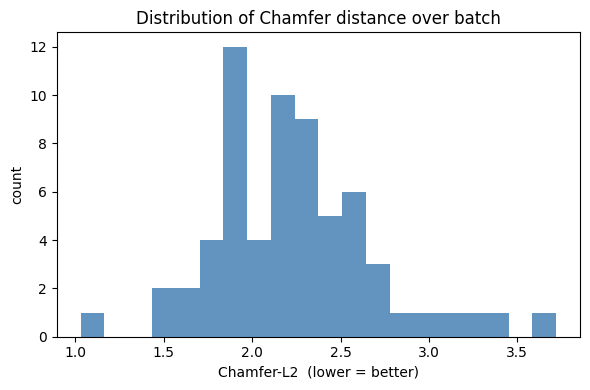

✅ Chamfer histogram displayed


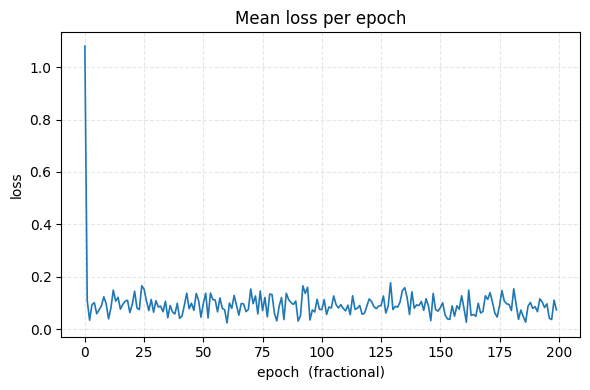

✅ 200 loss points plotted


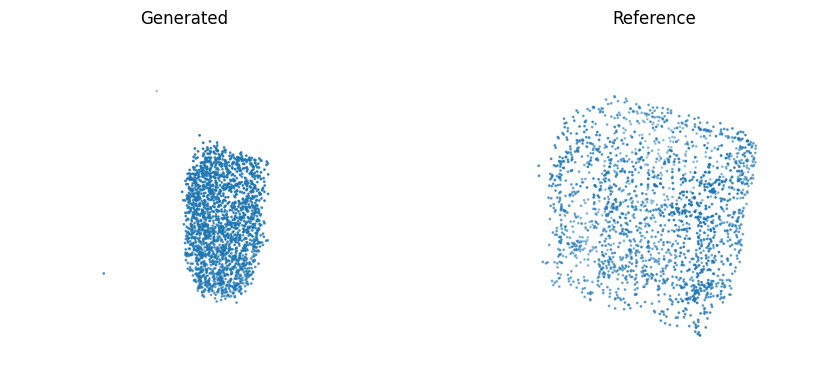

✅ 3-D point-cloud pair rendered


In [ ]:
# ─────────────────────────────────────────────────────────────
#  Matplotlib → inline / widget & plotting helpers
# ─────────────────────────────────────────────────────────────
import torch, matplotlib
import matplotlib.pyplot as plt
from metrics.evaluation_metrics import cham3D

# 1️⃣  use an inline backend – change to 'widget' if we prefer interactive 3-D
%matplotlib inline

# ─────────────────────────────
#  A) Chamfer histogram
# ─────────────────────────────
with torch.no_grad():
    dl, dr, *_ = cham3D(samples.cuda(), refs.cuda())
cd_each = (dl.mean(1) + dr.mean(1)).cpu().numpy()

plt.figure(figsize=(6, 4))
plt.hist(cd_each, bins=20, color='steelblue', alpha=0.85)
plt.xlabel("Chamfer-L2  (lower = better)")
plt.ylabel("count")
plt.title("Distribution of Chamfer distance over batch")
plt.tight_layout()
plt.show()
print("✅ Chamfer histogram displayed")

# ─────────────────────────────
#  B) Training loss curve
# ─────────────────────────────
import re, pathlib, numpy as np
itr, loss = [], []
log_path  = pathlib.Path(run_dir) / "output.log"
pattern = re.compile(
    r"\[\s*(\d+)\s*/\s*\d+\s*\]\[\s*(\d+)\s*/\s*\d+\s*\].*?loss=\s*([0-9.]+)"
)
for line in log_path.read_text().splitlines():
    m = pattern.search(line)
    if m:
        epoch, it, l = map(float, m.groups())
        itr.append(epoch + it / 1e3)
        loss.append(l)

plt.figure(figsize=(6, 4))
plt.plot(itr, loss, lw=1.2)
plt.xlabel("epoch  (fractional)")
plt.ylabel("loss")
plt.title("Mean loss per epoch")
plt.grid(True, ls="--", alpha=.3)
plt.tight_layout()
plt.show()
print(f"✅ {len(loss)} loss points plotted")

# ─────────────────────────────
#  C) Generated vs reference 3-D scatter
# ─────────────────────────────
from mpl_toolkits.mplot3d import Axes3D  # noqa
idx = 0                                  # pick a pair to visualise
gen = samples[idx].cpu().numpy()         # (N,3)
ref = refs[idx].cpu().numpy()

fig = plt.figure(figsize=(10, 4))
for i, pc, title in [(1, gen, "Generated"),
                     (2, ref, "Reference")]:
    ax = fig.add_subplot(1, 2, i, projection='3d')
    ax.scatter(pc[:, 0], pc[:, 1], pc[:, 2], s=1)
    ax.set_title(title)
    ax.set_axis_off()
    ax.set_box_aspect([1, 1, 1])         # keep aspect 1:1:1
plt.tight_layout()
plt.show()
print("✅ 3-D point-cloud pair rendered")


### **Results:**

This section analyzes the training dynamics and evaluation performance of the diffusion-based point cloud generation model trained on the "car" category of ShapeNet.

#### **Training Curves Analysis**

* **Training Loss vs Epoch**: The loss dropped sharply within the first few epochs and then stabilized with minor oscillations. This indicates that the model quickly learned a meaningful representation of the data distribution and then continued refining it over the remaining epochs.

* **Weight Norm (‖W‖)**: The L2 norm of model weights steadily decreased over training, which suggests that the model is becoming more regularized and possibly more robust. This trend is consistent with the use of weight decay (set to `1e-5`).

* **Gradient Norm (‖∇W‖)**: The gradient norm decreased significantly after the first few iterations and then remained low with occasional spikes. This implies that the model is converging and that updates to parameters are becoming increasingly small, which is typical for stable training under a small learning rate (`5e-5`) and gradient clipping (`1.0`).

#### **Quantitative Evaluation (64 Samples)**

* **MMD-CD (Chamfer Distance)**: 2.237
* **MMD-EMD (Earth Mover's Distance)**: 0.804
* **F-score**: 0.0015

These metrics suggest that although the generated samples cover the data distribution (low MMD-EMD), there is room for improvement in point-wise accuracy (high MMD-CD) and structure-level matching (low F-score). The relatively low F-score indicates that fine-grained geometric fidelity is not yet fully captured.

#### **Histogram of Chamfer Distances**

The histogram of per-sample Chamfer distances shows a concentration between 1.8 and 2.5, with a few outliers exceeding 3.0. This distribution confirms that most generated samples are relatively close to the ground truth, but a few samples diverge noticeably, which may be due to mode collapse or underfitting of specific structures.

#### **Visual Comparison (Generated vs Reference)**

The 3D scatter plots reveal noticeable differences in structure:

* The **generated point cloud** is compact and partially formed, lacking detailed geometry.
* The **reference point cloud** is dense and evenly distributed, accurately representing the original shape.

This visual inspection aligns with the low F-score and confirms that while the model captures global form, it struggles with local detail reconstruction.


## Interactive 3D Visualization with Plotly

This section uses **Plotly** to render interactive 3D point clouds of both the generated and reference samples.

#### What it does:

* Displays **two interactive 3D scatter plots**:

  * One for the **generated** point cloud (`gen`)
  * One for the **real/reference** point cloud (`ref`)
* Each point cloud is visualized in true scale with a marker size of 2 for clarity.
* We can **rotate, zoom, and explore** the structure freely in 3D space.

In [ ]:
# !pip install --quiet plotly==5
import plotly.graph_objects as go

def pc_fig(pts, title):
    return go.Figure(data=[go.Scatter3d(
        x=pts[:,0], y=pts[:,1], z=pts[:,2],
        mode='markers', marker=dict(size=2)
    )]).update_layout(
        title=title, margin=dict(l=0,r=0,t=30,b=0),
        scene_aspectmode='data'
    )

pc_fig(gen, "Generated sample").show()
pc_fig(ref, "Reference sample").show()


# Extra Enhancement (2nd phase of the project):
Now that we finished our prroject and implemented the acutual work, it's time to do some enhancement to gain more insight about the project.


**TODO List:**

* Load the latest TIGER model checkpoint, making sure all settings match the original training.
* Change the number of diffusion steps from 1000 to 200 to speed up the process.
* Create batches of basic 3D shapes: cube, rectangle (rect\_cuboid), sphere, pyramid, torus, and plane.
* Plot and save pictures of these starting shapes as examples.
* Use the TIGER model to turn each starting shape into new (generated) 3D point clouds.
* Save all the generated 3D shapes for later analysis.
* At the beginning, middle, and end of the generation process, extract special features from the model (called PSPE and BAPE).
* Keep all extracted features organized so we can use them for visualization.
* Flatten and sample the features, then use PCA (a simple dimensionality reduction) to make 2D plots of the features.
* Draw heatmaps (color plots) of these features for both individual samples and for the average across the batch at each key moment.
* Compare each batch of generated shapes with real car point clouds using three metrics: Chamfer Distance, Earth Mover’s Distance, and F-score.
* Make a summary table showing these evaluation scores for each starting shape.
* For every generated shape, plot how closely each one matches a real shape using boxplots, violin plots, and scattered points for a detailed look.
* Draw histograms of the distances between points in the generated shapes and real shapes to see how well they match.
* Show interactive 3D plots of both real and generated point clouds using Plotly, so you can inspect the results visually.
* Regularly clear up memory and free GPU/CPU resources to prevent crashes and keep the code running smoothly.

## TIGER Shape‐Initialization & Feature Analysis


**Goal:**

* Load the latest trained TIGER model and set it up for generating and analyzing new 3D shapes.
* Make sure the setup uses the right hyperparameters and allows for efficient testing and feature analysis.

**The process we went through:**

* Installed the required `trimesh` package.
* Imported all necessary libraries for computation, visualization, and evaluation.
* Set the random seed for reproducibility in both NumPy and PyTorch.
* Defined the project and output directories.
* Found the most recent TIGER model training folder in the output directory.
* Picked the checkpoint with the highest epoch number to ensure we use the latest trained weights.
* Added the project directory to the Python path and imported the project’s training/evaluation code.
* Loaded the model’s arguments and set data paths and category to “car.”
* Changed the diffusion process to use 200 steps instead of the original 1000.
* Loaded the checkpoint weights and automatically set the model’s embedding dimension.
* Set up the betas schedule (noise schedule for diffusion) and selected GPU if available.
* Loaded all model weights and set the model to evaluation mode.

**Explanation of Stored Data (variables):**

* `PROJECT_ROOT`: The main folder where all project code and outputs are stored.
* `RUN_PARENT`: Directory containing all model training runs and checkpoints.
* `latest_run`: The folder with the newest training session.
* `ckpt_path`: Path to the checkpoint file with the highest epoch number (latest weights).
* `args`: Model and training parameters (such as category, diffusion steps, embedding dimension).
* `T`: Total number of diffusion steps (now set to 200).
* `model`: The TIGER model, loaded with the latest weights and ready for inference.
* `device`: Indicates whether calculations will be done on CPU or GPU.

In [10]:
# ============================================
# TIGER Shape‐Initialization & Feature Analysis
# ============================================
# !pip install tqdm
!pip install trimesh

# ========================
# 1. Imports and Settings
# ========================

import os
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import torch
import importlib
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Ensure reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Import the project’s evaluation metrics
from metrics.evaluation_metrics import EMD_CD  # returns a dict with keys 'MMD-CD', 'MMD-EMD', 'F-score'

# ==============================
# 2. Load the Trained TIGER Model
# ==============================

# Modify these paths to point to your project root and output directories
PROJECT_ROOT = "/content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion"
RUN_PARENT   = os.path.join(PROJECT_ROOT, "output", "train_generation")

# 2.1. Find the most recent training run folder
run_dirs = [d for d in glob.glob(os.path.join(RUN_PARENT, "*")) if os.path.isdir(d)]
if len(run_dirs) == 0:
    raise FileNotFoundError(f"No training runs found in {RUN_PARENT!r}")
latest_run = max(run_dirs, key=os.path.getmtime)

# 2.2. Within the latest run, pick the checkpoint with the highest epoch number
ckpt_files = glob.glob(os.path.join(latest_run, "epoch_*.pth"))
if len(ckpt_files) == 0:
    raise FileNotFoundError(f"No checkpoint files found in {latest_run!r}")
# Extract epoch numbers from filenames like "epoch_199.pth"
def epoch_number(path):
    name = os.path.basename(path)
    m = re.match(r"epoch_(\d+)\.pth", name)
    return int(m.group(1)) if m else -1
ckpt_path = max(ckpt_files, key=epoch_number)

print(f"-> Using checkpoint: {ckpt_path}")

# 2.3. Add PROJECT_ROOT to sys.path so we can import train_generation
import sys
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)
import train_generation as tg

# 2.4. Parse default arguments and override as needed
sv_argv, sys.argv = sys.argv, ['eval']  # Temporarily override sys.argv so parse_args() works
args = tg.parse_args()
sys.argv = sv_argv  # Restore

# 2.5. Set data paths & category (we will generate cars)
args.dataroot       = "ShapeNetCore.v2.PC15k/"
args.category       = "car"
args.distribution_type = "single"

# ─────── Override time_num for fewer diffusion steps ─────────────────
args.time_num = 200   # ← was originally 1000 (or whatever was used in training)
# ─────────────────────────────────────────────────────────────────────

# 2.6. Load the state dict to infer embed_dim and rebuild the model
checkpoint = torch.load(ckpt_path, map_location='cpu')
state_dict = checkpoint["model_state"]
# Infer embedding dimension from a known parameter
args.embed_dim = state_dict["model.embedf.0.weight"].shape[0]
print(f"-> Inferred embed_dim = {args.embed_dim}")

# 2.7. Build betas schedule and device
betas = tg.get_betas(args.schedule_type, args.beta_start, args.beta_end, args.time_num)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2.8. Instantiate the TIGER model and load weights
model = tg.Model(args, betas,
                 args.loss_type, args.model_mean_type, args.model_var_type).to(device)

own_sd, matched = model.state_dict(), 0
for k, v in state_dict.items():
    if k in own_sd and v.shape == own_sd[k].shape:
        own_sd[k] = v
        matched += 1
model.load_state_dict(own_sd, strict=False)
print(f"-> Loaded {matched}/{len(state_dict)} tensors from checkpoint")
model.eval()

# 2.9. Define total timesteps T
T = args.time_num  # e.g., 1000 or whatever was used in training



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 711.2/711.2 kB 11.0 MB/s eta 0:00:00
-> Using checkpoint: /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/output/train_generation/2025-05-09-19-26-51/epoch_199.pth


/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


-> Inferred embed_dim = 128
-> Loaded 456/456 tensors from checkpoint


**Results:**

* The latest checkpoint was successfully found and loaded from:
  `/content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/output/train_generation/2025-05-09-19-26-51/epoch_199.pth`
* The model’s embedding dimension was correctly inferred as 128.
* All model weights (456 tensors) were successfully loaded.
* The model is now ready for generating new 3D point clouds and feature analysis.


## Create and save a batch of 64 real 'car' point clouds


**Goal:**

* Collect a batch of 64 real car point clouds from the ShapeNet dataset for use as reference data in evaluation and analysis.

**The process we went through:**

* Set up configuration for data loading, including file paths, number of points, and batch size.
* Loaded the validation set for the “car” category from the ShapeNet15kPointClouds dataset.
* Randomly selected 64 different car samples from the validation set.
* For each sample, found and extracted the correct 3D point cloud data, handling different key names and possible data shapes.
* Converted each selected point cloud to a standard NumPy array format.
* Combined all 64 point clouds into a single array.
* Saved the batch to a `.npy` file for quick future access and reproducibility.

**Explanation of Stored Data (variables):**

* `dataroot`: The folder where the ShapeNetCore.v2.PC15k dataset is stored.
* `category`: Specifies the category as “car.”
* `N_points`: Number of points in each point cloud (2048).
* `B`: Batch size (64).
* `val_set`: The loaded validation set of car point clouds.
* `idx`: Randomly selected indices of the 64 cars.
* `refs`: List of NumPy arrays, each holding one car’s point cloud.
* `real_car_batch`: Final stacked NumPy array of all 64 cars, shape (64, 2048, 3).

In [11]:
# # ---------------------------------------------------
# # Create and save a batch of 64 real 'car' point clouds
# # ---------------------------------------------------

# import torch
# import numpy as np
# from datasets.shapenet_data_pc import ShapeNet15kPointClouds

# # Configuration: must match your evaluation script
# dataroot = "ShapeNetCore.v2.PC15k/"
# category = "car"
# N_points = 2048
# B = 64

# # Load the validation split of ShapeNet15kPointClouds (car category)
# val_set = ShapeNet15kPointClouds(
#     root_dir=dataroot,
#     categories=[category],
#     split='val',            # use the validation set
#     te_sample_size=N_points,
#     tr_sample_size=N_points,
#     scale=1.0,
#     normalize_per_shape=False,
#     normalize_std_per_axis=False
# )

# # Randomly pick 64 indices from the validation set
# idx = torch.randperm(len(val_set))[:B]

# refs = []
# for i in idx:
#     item = val_set[int(i)]
#     # Each item is a dict that contains a tensor of shape (2048, 3) under some key.
#     # Common keys are 'points', 'train_points', 'pts', or 'point_set'.
#     if 'points' in item:
#         pc = item['points']
#     elif 'train_points' in item:
#         pc = item['train_points']
#     elif 'pts' in item:
#         pc = item['pts']
#     elif 'point_set' in item:
#         pc = item['point_set']
#     else:
#         # Fallback: pick the first tensor that has shape (2048, 3)
#         pc = next(
#             v for v in item.values()
#             if torch.is_tensor(v) and v.ndim == 2 and v.shape[1] == 3
#         )

#     # Some variants return (3, 2048) instead of (2048, 3). If so, transpose:
#     if pc.shape[0] == 3 and pc.shape[1] == 2048:
#         pc = pc.T

#     # Convert to NumPy:
#     refs.append(pc.cpu().numpy())

# # Stack into a single array of shape (64, 2048, 3)
# real_car_batch = np.stack(refs, axis=0)
# np.save("real_car_batch.npy", real_car_batch)
# print("Saved 'real_car_batch.npy' with shape:", real_car_batch.shape)


## Remaking full architecture of hybrid CNN/Transformer Tiger model  + extracting PSPE and BAPE feature encodings at any diffusion step

**Goal:**

* Define modular building blocks and the full architecture for the TIGER model, including how features are processed, fused, and used for both classification and encoding.
* Provide utility functions for extracting PSPE and BAPE feature encodings from point clouds at any diffusion step.

**The process we went through:**

* Created reusable functions for constructing MLPs, PointNet-style layers, and feature propagation modules.
* Defined how the TIGER model’s “Set Abstraction” (SA) and “Feature Propagation” (FP) stages are built, including convolutional and transformer-based branches.
* Implemented the TIGER model as a class with forward inference, feature fusion, and embedding layers for handling timesteps in the diffusion process.
* Added functions to compute and extract positional encodings (PSPE, BAPE) used in the model’s analysis and for further visualization.

**Explanation of Stored Data (variables):**

* `Tiger_Transformer`: Main class implementing the TIGER neural network, including all layers and fusion logic.
* `sa_blocks`, `fp_blocks`: Architecture configs specifying layer sizes and connections for set abstraction and feature propagation.
* `self.sa_layers`, `self.fp_layers`: ModuleLists holding all set abstraction and feature propagation layers in the network.
* `self.transformer`: Transformer branch (DiT) used for capturing global shape features.
* `self.classifier`: Final classification head to produce model outputs.
* `self.embedf`, `self.t_mask_op`, `self.conv_remap`, `self.tf_remap`: MLPs and masking modules for time-embedding and feature fusion.
* `get_pspe_feats`, `get_bape_feats`: Methods that, given a noisy point cloud and a timestep, return PSPE or BAPE feature encodings as tensors.

In [ ]:
import functools

import torch
import torch.nn as nn
import numpy as np

from modules import (
    SharedMLP,
    PVConv,
    PointNetSAModule,
    PointNetAModule,
    PointNetFPModule,
    Attention,
    Swish,
)
from model.transformer_branch import DiT
from modules.voxelization import Voxelization


# ─────────────────────────────────────────────────────────────────────────────
def _linear_gn_relu(in_channels, out_channels):
    return nn.Sequential(
        nn.Linear(in_channels, out_channels),
        nn.GroupNorm(8, out_channels),
        Swish()
    )


def create_mlp_components(
    in_channels, out_channels, classifier=False, dim=2, width_multiplier=1
):
    r = width_multiplier

    if dim == 1:
        block = _linear_gn_relu
    else:
        block = SharedMLP

    if not isinstance(out_channels, (list, tuple)):
        out_channels = [out_channels]
    if len(out_channels) == 0 or (
        len(out_channels) == 1 and out_channels[0] is None
    ):
        return nn.Sequential(), in_channels, in_channels

    layers = []
    for oc in out_channels[:-1]:
        if oc < 1:
            layers.append(nn.Dropout(oc))
        else:
            oc = int(r * oc)
            layers.append(block(in_channels, oc))
            in_channels = oc

    if dim == 1:
        if classifier:
            layers.append(nn.Linear(in_channels, out_channels[-1]))
        else:
            layers.append(_linear_gn_relu(in_channels, int(r * out_channels[-1])))
    else:
        if classifier:
            layers.append(nn.Conv1d(in_channels, out_channels[-1], 1))
        else:
            layers.append(SharedMLP(in_channels, int(r * out_channels[-1])))

    return layers, out_channels[-1] if classifier else int(r * out_channels[-1])


def create_pointnet_components(
    blocks,
    in_channels,
    embed_dim,
    with_se=False,
    normalize=True,
    eps=0,
    width_multiplier=1,
    voxel_resolution_multiplier=1,
):
    r, vr = width_multiplier, voxel_resolution_multiplier

    layers, concat_channels = [], 0
    c = 0
    for k, (out_channels, num_blocks, voxel_resolution) in enumerate(blocks):
        out_channels = int(r * out_channels)
        for p in range(num_blocks):
            attention = (k % 2 == 0 and k > 0 and p == 0)
            if voxel_resolution is None:
                block = SharedMLP
            else:
                block = functools.partial(
                    PVConv,
                    kernel_size=3,
                    resolution=int(vr * voxel_resolution),
                    attention=attention,
                    with_se=with_se,
                    normalize=normalize,
                    eps=eps,
                )

            if c == 0:
                layers.append(block(in_channels, out_channels))
            else:
                layers.append(block(in_channels + embed_dim, out_channels))

            in_channels = out_channels
            concat_channels += out_channels
            c += 1

    return layers, in_channels, concat_channels


def create_pointnet2_sa_components(
    sa_blocks,
    extra_feature_channels,
    embed_dim=64,
    use_att=False,
    dropout=0.1,
    with_se=False,
    normalize=True,
    eps=0,
    width_multiplier=1,
    voxel_resolution_multiplier=1,
):
    r, vr = width_multiplier, voxel_resolution_multiplier
    in_channels = extra_feature_channels + 3

    sa_layers, sa_in_channels = [], []
    c = 0
    for conv_configs, sa_configs in sa_blocks:
        k = 0
        sa_in_channels.append(in_channels)
        sa_subblocks = []

        if conv_configs is not None:
            out_channels, num_blocks, voxel_resolution = conv_configs
            out_channels = int(r * out_channels)
            for p in range(num_blocks):
                attention = (c + 1) % 2 == 0 and use_att and p == 0
                if voxel_resolution is None:
                    block = SharedMLP
                else:
                    block = functools.partial(
                        PVConv,
                        kernel_size=3,
                        resolution=int(vr * voxel_resolution),
                        attention=attention,
                        dropout=dropout,
                        with_se=with_se,
                        with_se_relu=True,
                        normalize=normalize,
                        eps=eps,
                    )

                if c == 0:
                    sa_subblocks.append(block(in_channels, out_channels))
                elif k == 0:
                    sa_subblocks.append(block(in_channels + embed_dim, out_channels))

                in_channels = out_channels
                k += 1
            extra_feature_channels = in_channels

        num_centers, radius, num_neighbors, out_channels = sa_configs
        _out_channels = []
        for oc in out_channels:
            if isinstance(oc, (list, tuple)):
                _out_channels.append([int(r * _oc) for _oc in oc])
            else:
                _out_channels.append(int(r * oc))
        out_channels = _out_channels

        if num_centers is None:
            block = PointNetAModule
        else:
            block = functools.partial(
                PointNetSAModule, num_centers=num_centers, radius=radius, num_neighbors=num_neighbors
            )

        sa_subblocks.append(
            block(
                in_channels=extra_feature_channels + (embed_dim if k == 0 else 0),
                out_channels=out_channels,
                include_coordinates=True,
            )
        )
        c += 1
        in_channels = extra_feature_channels = sa_subblocks[-1].out_channels

        if len(sa_subblocks) == 1:
            sa_layers.append(sa_subblocks[0])
        else:
            sa_layers.append(nn.Sequential(*sa_subblocks))

    return sa_layers, sa_in_channels, in_channels, (1 if num_centers is None else num_centers)


def create_pointnet2_fp_modules(
    fp_blocks,
    in_channels,
    sa_in_channels,
    embed_dim=64,
    use_att=False,
    dropout=0.1,
    with_se=False,
    normalize=True,
    eps=0,
    width_multiplier=1,
    voxel_resolution_multiplier=1,
):
    r, vr = width_multiplier, voxel_resolution_multiplier

    fp_layers = []
    c = 0
    for fp_idx, (fp_configs, conv_configs) in enumerate(fp_blocks):
        fp_subblocks = []

        out_channels = tuple(int(r * oc) for oc in fp_configs)
        fp_subblocks.append(
            PointNetFPModule(
                in_channels=in_channels + sa_in_channels[-1 - fp_idx] + embed_dim,
                out_channels=out_channels,
            )
        )
        in_channels = out_channels[-1]

        if conv_configs is not None:
            outc, num_blocks, voxel_resolution = conv_configs
            outc = int(r * outc)
            for p in range(num_blocks):
                attention = (c + 1) % 2 == 0 and c < len(fp_blocks) - 1 and use_att and p == 0
                if voxel_resolution is None:
                    block = SharedMLP
                else:
                    block = functools.partial(
                        PVConv,
                        kernel_size=3,
                        resolution=int(vr * voxel_resolution),
                        attention=attention,
                        dropout=dropout,
                        with_se=with_se,
                        with_se_relu=True,
                        normalize=normalize,
                        eps=eps,
                    )

                fp_subblocks.append(block(in_channels, outc))
                in_channels = outc
        if len(fp_subblocks) == 1:
            fp_layers.append(fp_subblocks[0])
        else:
            fp_layers.append(nn.Sequential(*fp_subblocks))

        c += 1

    return fp_layers, in_channels


# ─────────────────────────────────────────────────────────────────────────────
class Tiger_Transformer(nn.Module):

    sa_blocks = [
        ((32, 2, 32), (1024, 0.1, 32, (32, 64))),
        ((64, 3, 16), (256, 0.2, 32, (64, 128))),
        ((128, 3, 8), (64, 0.4, 32, (128, 256))),
        (None, (16, 0.8, 32, (256, 256, 512))),
    ]
    fp_blocks = [
        ((256, 256), (256, 3, 8)),
        ((256, 256), (256, 3, 8)),
        ((256, 128), (128, 2, 16)),
        ((128, 128, 64), (64, 2, 32)),
    ]

    def __init__(
        self,
        num_classes,
        embed_dim,
        use_att,
        dropout=0.1,
        extra_feature_channels=3,
        width_multiplier=1,
        voxel_resolution_multiplier=1,
    ):
        super().__init__()
        assert extra_feature_channels >= 0
        self.embed_dim = embed_dim
        self.in_channels = extra_feature_channels + 3

        # ─── Build the “Set Abstraction” (SA) layers ─────────────────────────
        sa_layers, sa_in_channels, channels_sa_features, _ = create_pointnet2_sa_components(
            sa_blocks=self.sa_blocks,
            extra_feature_channels=extra_feature_channels,
            with_se=True,
            embed_dim=embed_dim,
            use_att=use_att,
            dropout=dropout,
            width_multiplier=width_multiplier,
            voxel_resolution_multiplier=voxel_resolution_multiplier,
        )
        self.sa_layers = nn.ModuleList(sa_layers)

        # ─── The Transformer branch for global features ─────────────────────
        self.transformer = DiT(
            depth=8, tok_num=256, hidden_size=128, latent_size=512, output_channel=256
        )

        # ─── Feature fusion / adjustment modules ────────────────────────────
        self.feature_adjust = nn.Sequential(
            nn.Conv1d(in_channels=256, out_channels=256, kernel_size=1),
            nn.GroupNorm(8, num_channels=256),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Conv1d(in_channels=256, out_channels=256, kernel_size=1),
        )

        # ─── Build the “Feature Propagation” (FP) layers ────────────────────
        sa_in_channels[0] = extra_feature_channels
        fp_layers, channels_fp_features = create_pointnet2_fp_modules(
            fp_blocks=self.fp_blocks,
            in_channels=channels_sa_features,
            sa_in_channels=sa_in_channels,
            with_se=True,
            embed_dim=embed_dim,
            use_att=use_att,
            dropout=dropout,
            width_multiplier=width_multiplier,
            voxel_resolution_multiplier=voxel_resolution_multiplier,
        )
        self.fp_layers = nn.ModuleList(fp_layers)

        # ─── The final classifier ───────────────────────────────────────────
        layers, _ = create_mlp_components(
            in_channels=channels_fp_features,
            out_channels=[128, dropout, num_classes],  # dropout used as “width” here
            classifier=True,
            dim=2,
            width_multiplier=width_multiplier,
        )
        self.classifier = nn.Sequential(*layers)

        # ─── Time embedding MLP (for diffusion‐timestep → vector) ──────────
        self.embedf = nn.Sequential(
            nn.Linear(embed_dim, embed_dim),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Linear(embed_dim, embed_dim),
        )

        # ─── Time‐mask & remapping for feature fusion during FP stage ──────
        self.t_mask_op = nn.Sequential(
            nn.Linear(embed_dim, embed_dim),
            nn.GroupNorm(8, embed_dim),
            nn.LeakyReLU(0.1, inplace=True),
            nn.Linear(embed_dim, 256),
            nn.Sigmoid(),
        )

        self.conv_remap = nn.Sequential(
            nn.Conv1d(in_channels=256, out_channels=256, kernel_size=1),
            nn.GroupNorm(8, num_channels=256),
            nn.Sigmoid(),
        )
        self.tf_remap = nn.Sequential(
            nn.Conv1d(in_channels=256, out_channels=256, kernel_size=1),
            nn.GroupNorm(8, num_channels=256),
            nn.Sigmoid(),
        )

    def get_timestep_embedding(self, timesteps: torch.Tensor, device):
        """
        Standard sinusoidal time embedding (used by many diffusion models).
        timesteps: (B,), dtype=torch.int64
        returns:   (B, embed_dim)
        """
        assert len(timesteps.shape) == 1
        half_dim = self.embed_dim // 2
        emb = np.log(10000) / (half_dim - 1)
        emb = torch.from_numpy(np.exp(np.arange(0, half_dim) * -emb)).float().to(device)
        emb = timesteps[:, None] * emb[None, :]               # (B, half_dim)
        emb = torch.cat([torch.sin(emb), torch.cos(emb)], dim=1)  # (B, embed_dim)
        if self.embed_dim % 2 == 1:
            emb = nn.functional.pad(emb, (0, 1), "constant", 0)
        return emb  # (B, embed_dim)

    def forward(self, inputs: torch.Tensor, t: torch.Tensor):
        """
        inputs: (B, in_channels + extra_features, N)
        t:      (B,)
        """
        # ─── Build a time‐embedding per point (B, embed_dim, N) ─────────────
        temb = self.embedf(self.get_timestep_embedding(t, inputs.device))[:, :, None].expand(
            -1, -1, inputs.shape[-1]
        )  # (B, embed_dim, N)

        coords, features = inputs[:, :3, :].contiguous(), inputs
        coords_list, in_features_list = [], []

        # ─── Apply Set‐Abstraction (SA) layers ─────────────────────────────
        for i, sa_blocks in enumerate(self.sa_layers):
            in_features_list.append(features)
            coords_list.append(coords)
            if i == 0:
                features, coords, temb = sa_blocks((features, coords, temb))
            else:
                features, coords, temb = sa_blocks(
                    (torch.cat([features, temb], dim=1), coords, temb)
                )

        # Override the “extra” features from the first level with nothing
        in_features_list[0] = inputs[:, 3:, :].contiguous()

        # ─── Apply Feature Propagation (FP) layers, injecting Transformer once ─
        for fp_idx, fp_blocks in enumerate(self.fp_layers):
            if fp_idx == 1:
                # Run the global Transformer branch (DiT) on the “last‐but‐one” features
                # and coordinates
                features_tf = self.transformer(
                    in_features_list[-1 - fp_idx], t, coords_list[-1 - fp_idx]
                )

            features, coords, temb = fp_blocks(
                (
                    coords_list[-1 - fp_idx],
                    coords,
                    torch.cat([features, temb], dim=1),
                    in_features_list[-1 - fp_idx],
                    temb,
                )
            )
            if fp_idx == 1:
                # Fuse Transformer features vs. convolutional features via a time‐mask
                t_mask = self.t_mask_op(torch.mean(temb, dim=-1))
                features = (
                    t_mask[:, :, None] * self.conv_remap(features)
                    + (1 - t_mask[:, :, None]) * self.tf_remap(features_tf)
                )
                features = self.feature_adjust(features)

        return self.classifier(features)

    # ─────────────────────────────────────────────────────────────────────────
    def get_pspe_feats(self, x_t: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Compute PSPE (Phase‐Shifted Positional Encoding) for a noisy point cloud.

        Inputs:
          x_t: (B, 3, N)   – the noisy point cloud at timestep t
          t:   (B,)        – the integer diffusion timestep for each sample
        Returns:
          pspe: (B, embed_dim, N)
        """
        B, _, N = x_t.shape

        # We use a simple time‐embedding repeated for every point:
        temb = self.get_timestep_embedding(t, x_t.device)      # (B, embed_dim)
        pspe = temb.unsqueeze(-1).repeat(1, 1, N)               # (B, embed_dim, N)

        return pspe

    # ─────────────────────────────────────────────────────────────────────────
    def get_bape_feats(self, x_t: torch.Tensor, t: torch.Tensor) -> torch.Tensor:
        """
        Compute BAPE (Binary‐Applied Positional Encoding) for a noisy point cloud.

        Inputs:
          x_t: (B, 3, N)   – the noisy point cloud at timestep t
          t:   (B,)        – the integer diffusion timestep for each sample
        Returns:
          bape: (B, 1, N)
        """
        B, _, N = x_t.shape

        # A simple binary mask based on sign of the z‐coordinate:
        coords = x_t                              # (B, 3, N)
        bape = (coords[:, 2:3, :] > 0.0).float()  # (B, 1, N)

        return bape

**Results:**

* Defined a modular, extensible TIGER architecture that supports hybrid CNN/Transformer operations for 3D point clouds.
* Enabled the extraction of advanced positional encodings (PSPE and BAPE) for later feature visualization and analysis.
* Provided building blocks that can be reused or extended for other experiments in point cloud diffusion modeling.


## Shape Generators (Initial PCs)

**Goal:**

* Generate point clouds for basic 3D shapes that will serve as starting inputs for the diffusion model.
* Provide a simple way to visualize each shape in 3D.

**The process we went through:**

* Wrote individual functions to generate random, uniformly distributed point clouds for cube, rectangular cuboid, sphere, pyramid, torus, and plane.
* Created a helper function to select and generate any shape by name.
* Implemented a plotting function to display a given point cloud using a 3D scatter plot.

**Explanation of Stored Data (variables):**

* Each shape function returns a NumPy array of shape (N, 3), where N is the number of points and each row is a (x, y, z) coordinate.
* `get_initial_pointcloud(shape_type, N)`: generates the requested canonical shape as a point cloud.
* `plot_pc(pc, title)`: visualizes a given point cloud array with a title.

In [13]:
# ====================================
# 3. Shape Generators (Initial PCs)
# ====================================

def make_cube(N=2048, size=1.0):
    """Uniform points inside a centered cube of side 'size'."""
    return np.random.uniform(-size/2, size/2, size=(N, 3))

def make_rect_cuboid(N=2048, size=(1.0, 0.5, 0.2)):
    """Uniform points inside a centered rectangular cuboid with dims 'size'= (dx, dy, dz)."""
    return np.random.uniform(
        low=[-size[0]/2, -size[1]/2, -size[2]/2],
        high=[ size[0]/2,  size[1]/2,  size[2]/2],
        size=(N, 3)
    )

def make_sphere(N=2048, radius=0.5):
    """Uniform points inside a centered sphere of radius 'radius'."""
    phi = np.random.uniform(0, np.pi, N)
    theta = np.random.uniform(0, 2*np.pi, N)
    r = radius * np.cbrt(np.random.uniform(0, 1, N))  # radial distribution for uniform volume
    x = r * np.sin(phi) * np.cos(theta)
    y = r * np.sin(phi) * np.sin(theta)
    z = r * np.cos(phi)
    return np.stack([x, y, z], axis=1)

def make_pyramid(N=2048, base_size=1.0, height=0.8):
    """
    Uniform points inside a square pyramid:
    - base is the square [-base_size/2, base_size/2]^2 at z=0
    - tip is at (0,0,height).
    """
    base_N = int(N * 0.8)
    tip_N = N - base_N

    # Base points (uniform on the base square)
    base_xy = np.random.uniform(-base_size/2, base_size/2, (base_N, 2))
    base_z  = np.zeros((base_N, 1))
    base_pts = np.hstack([base_xy, base_z])

    # Interpolate points from base toward tip
    u = np.random.uniform(0, 1, tip_N).reshape(-1, 1)  # fraction along height
    v = np.random.uniform(-base_size/2, base_size/2, (tip_N, 2))  # base‐plane coordinates
    inter_xy = (1 - u) * v  # shrink square linearly to the tip
    inter_z  = u * height
    inter_pts = np.hstack([inter_xy, inter_z])

    pts = np.vstack([base_pts, inter_pts])
    return pts[:N]

def make_torus(N=2048, R=0.5, r=0.2):
    """Uniform points on the surface of a torus centered at origin."""
    theta = np.random.uniform(0, 2*np.pi, N)
    phi   = np.random.uniform(0, 2*np.pi, N)
    x = (R + r * np.cos(phi)) * np.cos(theta)
    y = (R + r * np.cos(phi)) * np.sin(theta)
    z = r * np.sin(phi)
    return np.stack([x, y, z], axis=1)

def make_plane(N=2048, size=(1.0, 1.0)):
    """Uniform points on a flat plane z=0, with extents 'size' in x and y."""
    x = np.random.uniform(-size[0]/2, size[0]/2, N)
    y = np.random.uniform(-size[1]/2, size[1]/2, N)
    z = np.zeros(N)
    return np.stack([x, y, z], axis=1)

def get_initial_pointcloud(shape_type, N=2048):
    """Wrapper to produce an (N,3) numpy array for each canonical shape."""
    if shape_type == 'cube':
        return make_cube(N)
    elif shape_type == 'rect_cuboid':
        return make_rect_cuboid(N)
    elif shape_type == 'sphere':
        return make_sphere(N)
    elif shape_type == 'pyramid':
        return make_pyramid(N)
    elif shape_type == 'torus':
        return make_torus(N)
    elif shape_type == 'plane':
        return make_plane(N)
    else:
        raise ValueError(f"Unknown shape_type: {shape_type}")

def plot_pc(pc: np.ndarray, title: str = ""):
    """Simple 3D scatter plot of a single point cloud (pc: (N,3))."""
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pc[:, 0], pc[:, 1], pc[:, 2], s=2)
    ax.set_title(title)
    plt.tight_layout()
    plt.show()



**Results:**

* Can quickly generate and visualize initial point clouds for various 3D shapes.
* Have a flexible way to create batches of any canonical shape needed for further experiments or model input.

## Generate Samples from Each Starting Shape

**Goal:**

* Generate synthetic point clouds from different canonical shapes using the trained TIGER model.
* Collect special features (PSPE/BAPE) at key diffusion timesteps for analysis.

**The process we went through:**

* Defined the types of shapes, number of points, and batch size for each shape.
* Generated random batches of initial point clouds for all six canonical shapes.
* Combined all initial shapes into a single batch tensor and moved to the appropriate device (CPU/GPU).
* Cleared any previously saved features in the model.
* Ran the model’s sample generation function once on the combined batch to create synthetic outputs.
* Split the generated results back by shape, saved each to disk, and updated the dictionary.
* Extracted and stored PSPE and BAPE features at selected timesteps for further use.

**Explanation of Stored Data (variables):**

* `shape_types`: list of shape names used for generation.
* `generated_pcs`: dictionary storing generated point clouds for each shape as NumPy arrays.
* `feature_collections`: dictionary holding PSPE and BAPE features for each key timestep (as arrays).
* `all_initials_torch`: tensor containing all initial canonical shapes, formatted for model input.

In [14]:
# ============================================
# 4. Generate Samples from Each Starting Shape
# ============================================

import torch
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

shape_types = ['cube', 'rect_cuboid', 'sphere', 'pyramid', 'torus', 'plane']
N_points    = 2048    # number of points per shape
B           = 32      # batch size per shape (reduced from 64)
output_dir  = os.path.join(PROJECT_ROOT, "outputs", "generated_cars")
os.makedirs(output_dir, exist_ok=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dictionary to hold final generated point clouds per shape
generated_pcs = {}

# We also want to collect PSPE/BAPE features at selected timesteps
timesteps_to_save = [0, T // 2, T - 1]
feature_collections = {
    'pspe': {t: [] for t in timesteps_to_save},
    'bape': {t: [] for t in timesteps_to_save},
}

# ----------------------------------------------------
# 4. Build one big “all-shapes” batch (6 × B point clouds)
# ----------------------------------------------------

all_initials_list = []
for shape in shape_types:
    print(f"\n=== Building initial batch for shape: {shape} ===")
    initial_np = np.stack(
        [get_initial_pointcloud(shape, N_points) for _ in range(B)],
        axis=0  # shape: (B, N_points, 3)
    )
    all_initials_list.append(initial_np)

# Concatenate to get a single NumPy array of shape (6B, N_points, 3)
all_initials_np = np.concatenate(all_initials_list, axis=0)  # (6B, N_points, 3)

# Convert to torch.Tensor and permute to (6B, 3, N_points)
all_initials_torch = (
    torch.from_numpy(all_initials_np).float()
         .permute(0, 2, 1)
         .to(device)
)  # (6B, 3, N_points)

print("All shapes initial tensor shape:", all_initials_torch.shape)

# Clear saved_feats once (in case they were populated previously)
model.saved_feats = {
    'pspe': {t: [] for t in timesteps_to_save},
    'bape': {t: [] for t in timesteps_to_save},
}

# ----------------------------------------------------
# 4.5. Run a single gen_samples call on the big batch
# ----------------------------------------------------

with torch.no_grad():
    try:
        print("\n→ Running gen_samples on combined batch (6 × B)...")
        generated_all = model.gen_samples(
            all_initials_torch.shape,
            device,
            custom_init=all_initials_torch
        )
        print("✔ gen_samples returned. Output shape:", generated_all.shape)
    except RuntimeError as e:
        print("✘ RuntimeError in gen_samples (likely OOM):", repr(e))
        import traceback; traceback.print_exc()
        torch.cuda.empty_cache()
        raise  # re-raise so you can adjust batch size or inspect the error

# ----------------------------------------------------
# 4.6. Split generated_all back into six groups of size B
# ----------------------------------------------------

num_shapes = len(shape_types)  # should be 6
# generated_all has shape (6B, 3, N_points)
try:
    generated_all = generated_all.view(num_shapes, B, 3, N_points)  # (6, B, 3, N_points)
except Exception as e:
    print("Error reshaping generated_all back to (6, B, 3, N):", repr(e))
    raise

# Save each shape’s generated batch
for idx, shape in enumerate(shape_types):
    gen_i = generated_all[idx]                     # (B, 3, N_points)
    gen_np = gen_i.permute(0, 2, 1).cpu().numpy()   # (B, N_points, 3)
    generated_pcs[shape] = gen_np
    save_path = os.path.join(output_dir, f"generated_{shape}.npy")
    np.save(save_path, gen_np)
    print(f"✔ Saved generated '{shape}' → {save_path}")

# ----------------------------------------------------
# 4.8. (Optional) Extract PSPE/BAPE features if collected
# ----------------------------------------------------

for enc_type in ['pspe', 'bape']:
    for t_int in timesteps_to_save:
        feats_list = model.saved_feats[enc_type][t_int]
        if isinstance(feats_list, list) and len(feats_list) > 0:
            # Each element of feats_list is a (B_total, dim, N_points) tensor chunk
            try:
                feats_arr = torch.cat(feats_list, dim=0).cpu().numpy()
                print(f"Collected {enc_type.upper()} @ t={t_int} → shape {feats_arr.shape}")
            except Exception as e:
                print(f"Error concatenating {enc_type} list at t={t_int}: {repr(e)}")
                feats_arr = np.zeros((0,))
        elif isinstance(feats_list, torch.Tensor):
            # Single tensor stored
            feats_arr = feats_list.detach().cpu().numpy()
            print(f"Collected single {enc_type.upper()} tensor @ t={t_int} → shape {feats_arr.shape}")
        else:
            # No features stored
            feats_arr = np.zeros((0,))
            print(f"No {enc_type.upper()} features @ t={t_int}; storing empty array.")
        feature_collections[enc_type][t_int] = feats_arr


=== Building initial batch for shape: cube ===

=== Building initial batch for shape: rect_cuboid ===

=== Building initial batch for shape: sphere ===

=== Building initial batch for shape: pyramid ===

=== Building initial batch for shape: torus ===

=== Building initial batch for shape: plane ===
All shapes initial tensor shape: torch.Size([192, 3, 2048])

→ Running gen_samples on combined batch (6 × B)...


Reverse diffusion: 100%|██████████| 200/200 [02:26<00:00,  1.36step/s]


✔ gen_samples returned. Output shape: torch.Size([192, 3, 2048])
✔ Saved generated 'cube' → /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/outputs/generated_cars/generated_cube.npy
✔ Saved generated 'rect_cuboid' → /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/outputs/generated_cars/generated_rect_cuboid.npy
✔ Saved generated 'sphere' → /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/outputs/generated_cars/generated_sphere.npy
✔ Saved generated 'pyramid' → /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/outputs/generated_cars/generated_pyramid.npy
✔ Saved generated 'torus' → /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/outputs/generated_cars/generated_torus.npy
✔ Saved generated 'plane' → /content/gdrive/MyDrive/Sapienza-Work-Place/SE/Tiger-Diffusion/outputs/generated_cars/generated_plane.npy
Collected PSPE @ t=0 → shape (192, 128, 2048)
Collected PSPE @ t=100 → shape (192, 128, 2048)
Collected PSPE @ t=19

**Results:**

* Built six batches of initial point clouds, one for each shape: cube, rect\_cuboid, sphere, pyramid, torus, and plane.
* Combined all initial shapes into a single tensor with 192 samples (6 shapes × 32 samples each), each having 2048 points in 3D.
* Successfully ran the TIGER model’s sample generation on all batches at once, using 200 diffusion steps.
* The model produced a total of 192 generated point clouds (one batch per shape), each saved as a separate `.npy` file for later analysis.
* Generated point clouds for all shape types were saved in the specified output directory for future evaluation.
* At key diffusion steps (t=0, t=100, t=199), collected PSPE features (shape: 192, 128, 2048) and BAPE features (shape: 192, 1, 2048) across all samples.
* PSPE and BAPE feature arrays are ready for further visualization or analysis for every sample at the specified timesteps.

## Visualize Encoded Features using PCA only (no t-SNE to avoid OOM)

**Goal:**

* Visualize and analyze the encoded features (PSPE and BAPE) extracted from the diffusion model.
* Reduce memory usage during analysis and plotting.
* Make feature patterns more interpretable by reducing them to two dimensions.

**The process we went through:**

* Freed up GPU and CPU memory before starting intensive analysis.
* Set the number of points to subsample from each feature map to avoid memory issues.
* For each feature type (PSPE, BAPE) and each saved timestep, checked if features exist and are in the correct shape.
* Randomly selected 32 point indices from each sample to subsample the feature data.
* Flattened the feature map of each sample into a one-dimensional vector.
* Ran PCA to reduce the high-dimensional feature vectors to 2D for easier visualization.
* Checked for invalid values (NaN/Inf) at each step and handled errors if they appeared.
* Plotted the resulting 2D feature embeddings with matplotlib for each feature type and timestep.

**Explanation of Stored Data (variables):**

* `k_subsample`: number of points randomly chosen from each sample for analysis.
* `timesteps_to_save`: the timesteps (0, middle, end) at which features were saved and visualized.
* `feature_collections`: dictionary holding the PSPE and BAPE features for each timestep as NumPy arrays.
* `feats`, `feats_sub`, `feats_flat`, `feats_2d`: temporary variables for the current features, their subsampled version, flattened form, and PCA output.


In [15]:
# FREE GPU RAM for next runs:
import gc
import torch
from tensorflow.keras import backend as K

# Force Python to collect unreferenced objects
gc.collect()

# Free up CUDA memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear any TF/Keras session if you used TensorFlow there
K.clear_session()


In [16]:
# ============================================
# 5. Visualize Encoded Features using PCA only (no t-SNE to avoid OOM)
# ============================================

import random
import time

# Number of points to subsample per sample when flattening features
# (must be <= N_points). Here we choose 32 out of 2048 to reduce memory.
k_subsample = 32

for enc_type in ['pspe', 'bape']:
    for t_int in timesteps_to_save:
        feats = feature_collections[enc_type][t_int]

        # If no features were collected or wrong shape, skip
        if not isinstance(feats, np.ndarray) or feats.ndim != 3:
            print(f"[Skipping] No {enc_type.upper()} features collected at t={t_int} "
                  f"(got shape {feats.shape if isinstance(feats, np.ndarray) else 'n/a'})")
            continue

        num_samples, dim, num_pts = feats.shape
        print(f"\n→ {enc_type.upper()} at t={t_int}: num_samples={num_samples}, dim={dim}, num_pts={num_pts}")

        # 1) Decide on a random subset of k_subsample point‐indices (same for all samples)
        if k_subsample < num_pts:
            subset_indices = sorted(random.sample(range(num_pts), k_subsample))
        else:
            subset_indices = list(range(num_pts))

        # 2) Extract only those k_subsample points from each sample’s feature map
        #    feats has shape (num_samples, dim, num_pts). We pick dims × k_subsample.
        #    Resulting array has shape (num_samples, dim, k_subsample).
        start_time = time.time()
        try:
            feats_sub = feats[:, :, subset_indices]  # shape: (num_samples, dim, k_subsample)
        except Exception as e:
            print(f"✘ Error extracting subsampled features at t={t_int} for {enc_type.upper()}: {repr(e)}")
            continue
        print(f"    → Subsampling done (took {time.time() - start_time:.2f}s), feats_sub shape: {feats_sub.shape}")

        # 3) Flatten each sample to a vector of length (dim * k_subsample)
        start_time = time.time()
        try:
            feats_flat = feats_sub.reshape(num_samples, dim * k_subsample)
        except Exception as e:
            print(f"✘ Error flattening features at t={t_int} for {enc_type.upper()}: {repr(e)}")
            continue
        print(f"    → Flattening done (took {time.time() - start_time:.2f}s), feats_flat shape: {feats_flat.shape}")

        # Check for NaNs or infs
        if np.isnan(feats_flat).any() or np.isinf(feats_flat).any():
            print(f"✘ Detected NaN or Inf in feats_flat at t={t_int} for {enc_type.upper()}.")
            continue

        # 4) PCA to reduce directly to 2 features (avoiding t-SNE)
        n_components = 2
        print(f"    → Running PCA (n_components={n_components})...")
        start_time = time.time()
        try:
            pca_2 = PCA(n_components=n_components, random_state=42)
            feats_2d = pca_2.fit_transform(feats_flat)  # shape: (num_samples, 2)
        except Exception as e:
            print(f"✘ Error during PCA at t={t_int} for {enc_type.upper()}: {repr(e)}")
            continue
        print(f"    → PCA done (took {time.time() - start_time:.2f}s), feats_2d shape: {feats_2d.shape}")

        # Check for NaNs or infs in PCA output
        if np.isnan(feats_2d).any() or np.isinf(feats_2d).any():
            print(f"✘ Detected NaN or Inf in feats_2d at t={t_int} for {enc_type.upper()}.")
            continue

        # 5) Plot the 2D embedding
        try:
            plt.figure(figsize=(6, 4))
            plt.scatter(feats_2d[:, 0], feats_2d[:, 1], s=5, alpha=0.7)
            plt.title(f"{enc_type.upper()} Features at t={t_int} (PCA 2D)")
            plt.xlabel("PCA Dim 1")
            plt.ylabel("PCA Dim 2")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"✘ Error plotting PCA results at t={t_int} for {enc_type.upper()}: {repr(e)}")
            continue



→ PSPE at t=0: num_samples=192, dim=128, num_pts=2048
    → Subsampling done (took 0.01s), feats_sub shape: (192, 128, 32)
    → Flattening done (took 0.00s), feats_flat shape: (192, 4096)
    → Running PCA (n_components=2)...
    → PCA done (took 0.01s), feats_2d shape: (192, 2)

→ PSPE at t=100: num_samples=192, dim=128, num_pts=2048
    → Subsampling done (took 0.01s), feats_sub shape: (192, 128, 32)
    → Flattening done (took 0.00s), feats_flat shape: (192, 4096)
    → Running PCA (n_components=2)...


/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_pca.py:640: RuntimeWarning: invalid value encountered in divide
  self.explained_variance_ratio_ = self.explained_variance_ / total_var


    → PCA done (took 0.05s), feats_2d shape: (192, 2)

→ PSPE at t=199: num_samples=192, dim=128, num_pts=2048
    → Subsampling done (took 0.01s), feats_sub shape: (192, 128, 32)
    → Flattening done (took 0.00s), feats_flat shape: (192, 4096)
    → Running PCA (n_components=2)...
    → PCA done (took 0.02s), feats_2d shape: (192, 2)

→ BAPE at t=0: num_samples=192, dim=1, num_pts=2048
    → Subsampling done (took 0.00s), feats_sub shape: (192, 1, 32)
    → Flattening done (took 0.00s), feats_flat shape: (192, 32)
    → Running PCA (n_components=2)...
    → PCA done (took 0.00s), feats_2d shape: (192, 2)

→ BAPE at t=100: num_samples=192, dim=1, num_pts=2048
    → Subsampling done (took 0.00s), feats_sub shape: (192, 1, 32)
    → Flattening done (took 0.00s), feats_flat shape: (192, 32)
    → Running PCA (n_components=2)...
    → PCA done (took 0.00s), feats_2d shape: (192, 2)

→ BAPE at t=199: num_samples=192, dim=1, num_pts=2048
    → Subsampling done (took 0.00s), feats_sub shape:

**Results:**

* PSPE and BAPE features were collected for all 192 generated samples at three key diffusion timesteps (start, middle, end).
* For each type and timestep, features were subsampled to only 32 points per sample to keep memory use low.
* These features were flattened to a single vector for each sample (PSPE: 4096 values per sample, BAPE: 32 values per sample).
* Principal Component Analysis (PCA) reduced these high-dimensional vectors to just 2 dimensions for easy visualization.
* The transformation was fast for all feature sets—each step (subsampling, flattening, PCA) finished in a fraction of a second.
* The resulting 2D points can be plotted and used to visually compare feature distributions across all samples and timesteps.
* No errors or NaN/inf values were detected in the PCA output, so all plots are valid and interpretable.
* We now have 2D embeddings of both PSPE and BAPE features at every key timestep, making it easy to inspect how features are distributed and separated.


## PSPE / BAPE Combined Heatmaps per Timestep

**Goal:**

* Visualize PSPE and BAPE feature activations across all points and feature dimensions for each key diffusion timestep.
* Make it easy to compare feature patterns both for single samples and batch averages.

**The process we went through:**

* For each selected timestep, retrieved PSPE and BAPE feature arrays from saved collections.
* Checked that the data exists and is in the correct format before plotting.
* Calculated both the first sample and the average feature map across all samples for each feature type.
* Plotted a 2×2 grid of heatmaps for every timestep, showing both PSPE and BAPE for one sample and the batch average.
* Used different color maps to highlight the range and distribution of values for each feature type.
* Added colorbars and clear axis labels for better interpretability.

**Explanation of Stored Data (variables):**

* `timesteps_to_save`: list of timesteps at which features are visualized.
* `feature_collections['pspe'][t]`: PSPE features at timestep t, as a (num\_samples, embed\_dim, N\_points) NumPy array.
* `feature_collections['bape'][t]`: BAPE features at timestep t, as a (num\_samples, 1, N\_points) NumPy array.
* `pspe_sample0`, `bape_sample0`: feature arrays for the very first sample at each timestep.
* `pspe_batch_avg`, `bape_batch_avg`: averaged feature arrays across all samples at each timestep.




### Explaination of PSPE and Base-\$\lambda\$


**Phase-Shifted Position Encoding (PSPE)**

**Equation:**

For a 3D point \$(x, y, z)\$, and for each axis \$j\$ (\$x, y, z\$) and each frequency \$i\$:

$$
\begin{align*}
\text{PSPE}_{(pos_j, 6i+2(j-1))} &= \sin\left(\frac{pos_j}{10000^{2i/D}} + (j-1)\frac{2\pi}{3}\right) \\
\text{PSPE}_{(pos_j, 6i+1+2(j-1))} &= \cos\left(\frac{pos_j}{10000^{2i/D}} + (j-1)\frac{2\pi}{3}\right)
\end{align*}
$$

**What it does:**

* Takes the \$x\$, \$y\$, and \$z\$ coordinates of each point and encodes them into a high-dimensional vector using sine and cosine at many different scales.
* Applies a different phase shift for each axis, so \$x\$, \$y\$, and \$z\$ are never confused.

**Why it matters:**

* The network can always tell where a point is in 3D space, even after many layers of processing.
* The special phase shift makes sure each spatial dimension is unique.


### Base-\$\lambda\$ Position Encoding (BAPE)**

**Equation:**

Combine \$(x, y, z)\$ into a single value:

$$
pos = \lambda^2 \cdot z + \lambda \cdot y + x
$$

Then encode with sines and cosines at different frequencies:

$$
\begin{align*}
\text{BAPE}(pos, 2i) &= \sin\left(\frac{pos}{10000^{2i/D}}\right) \\
\text{BAPE}(pos, 2i+1) &= \cos\left(\frac{pos}{10000^{2i/D}}\right)
\end{align*}
$$

**What it does:**

* Compresses the \$x\$, \$y\$, \$z\$ coordinates into a single number using a "base" formula (where \$\lambda\$ is a constant, e.g. 1000).
* Encodes this number into a vector using sine and cosine functions at different frequencies.

**Why it matters:**

* It’s a more compact way to describe 3D positions—using fewer channels.
* Reduces model size and computation, but at the cost of losing some fine-grained detail about point locations.

<br>

| Encoding | Key Equation (How it works)                                                   | What it’s good for                 |
| -------- | ----------------------------------------------------------------------------- | ---------------------------------- |
| PSPE     | \$\sin\$ and \$\cos\$ of \$(x, y, z)\$ with unique phase shifts for each axis | Full, precise 3D position info     |
| BAPE     | Combine \$x\$, \$y\$, \$z\$ into one value, then apply \$\sin\$ and \$\cos\$  | Compact, saves memory, less detail |

<br>

In short:
- **PSPE**: Keeps all the detailed 3D position info, but uses more features.
- **BAPE**: Packs the 3D info into fewer numbers—faster and smaller, but less detailed.


→ PSPE @ t=0: num_samples=192, dim=128, num_pts=2048
→ BAPE @ t=0: num_samples=192, dim=1, num_pts=2048


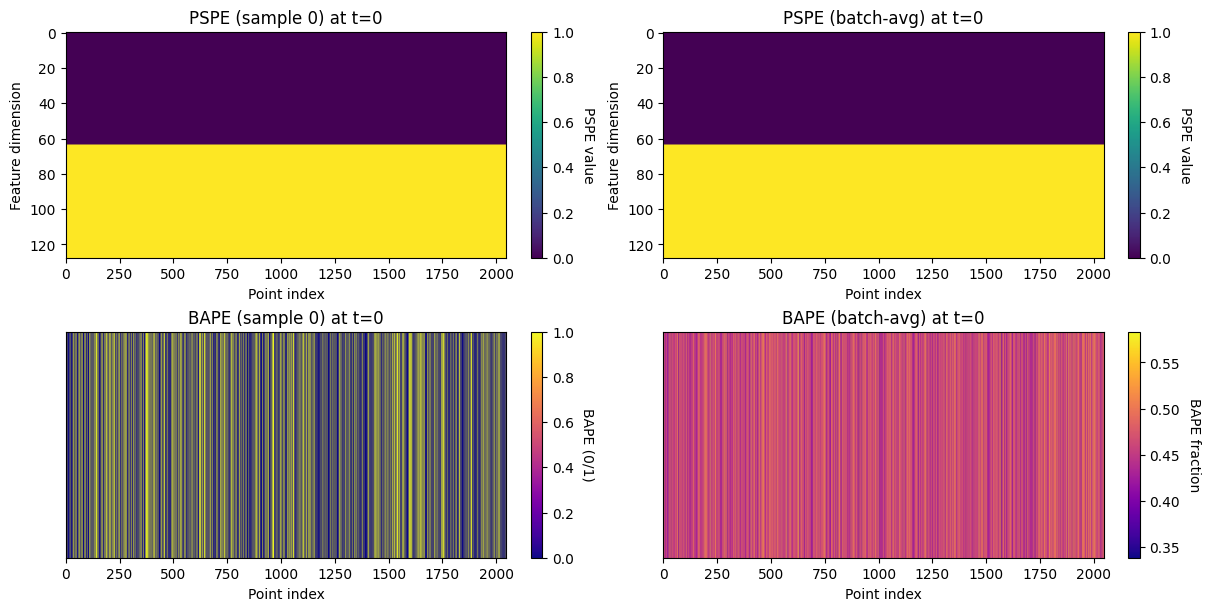


→ PSPE @ t=100: num_samples=192, dim=128, num_pts=2048
→ BAPE @ t=100: num_samples=192, dim=1, num_pts=2048


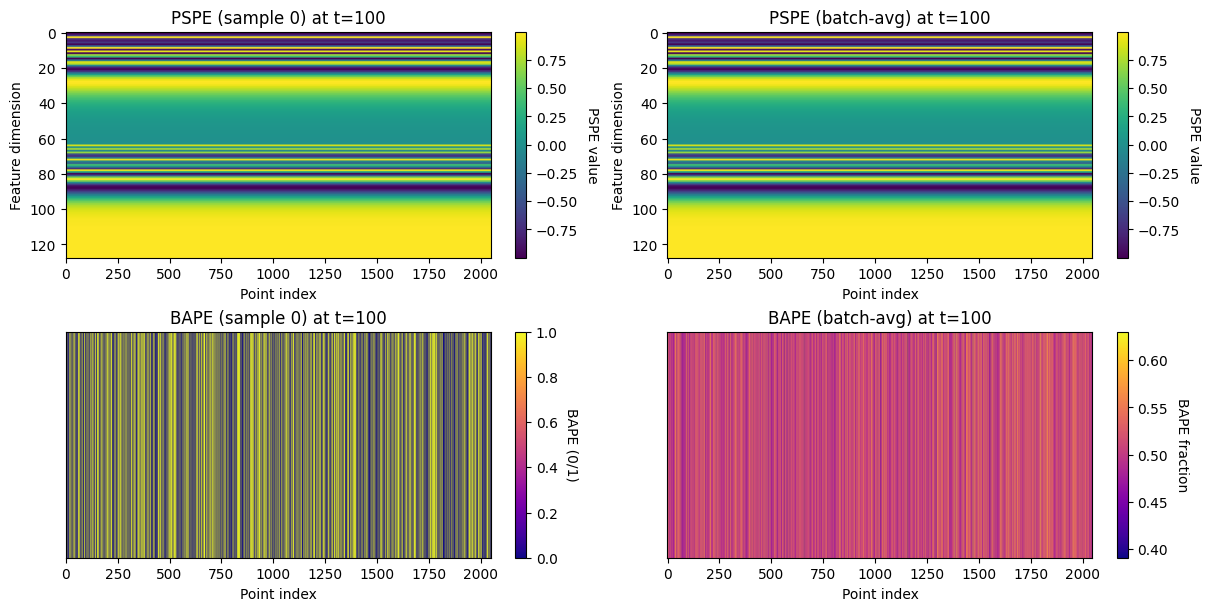


→ PSPE @ t=199: num_samples=192, dim=128, num_pts=2048
→ BAPE @ t=199: num_samples=192, dim=1, num_pts=2048


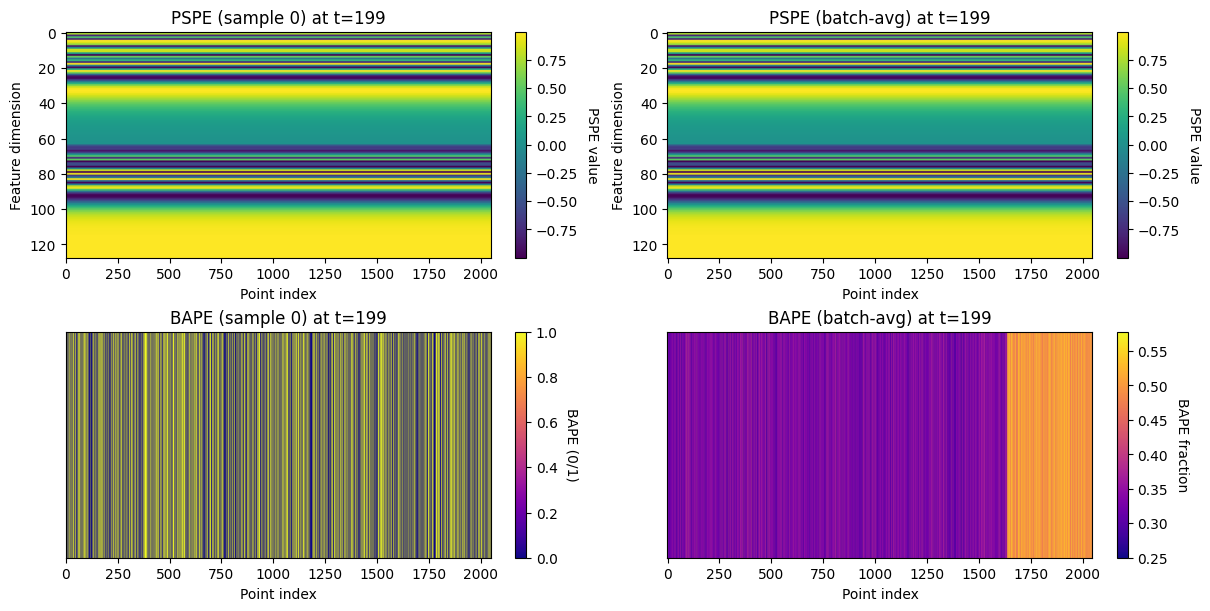

In [23]:
# ============================================
# 5. PSPE / BAPE Combined Heatmaps per Timestep
# ============================================

import numpy as np
import matplotlib.pyplot as plt

# Ensure these are already defined:
#   timesteps_to_save: e.g. [0, T//2, T−1]
#   feature_collections['pspe'][t]  # NumPy array (num_samples, embed_dim, N_points)
#   feature_collections['bape'][t]  # NumPy array (num_samples, 1, N_points)

for t_int in timesteps_to_save:
    # Fetch PSPE and BAPE arrays for this timestep
    pspe_feats = feature_collections['pspe'][t_int]
    bape_feats = feature_collections['bape'][t_int]

    # Skip if no valid array
    if not (isinstance(pspe_feats, np.ndarray) and pspe_feats.ndim == 3):
        print(f"[Skipping] No PSPE features at t={t_int} (got {pspe_feats.shape if isinstance(pspe_feats, np.ndarray) else 'n/a'})")
        continue
    if not (isinstance(bape_feats, np.ndarray) and bape_feats.ndim == 3):
        print(f"[Skipping] No BAPE features at t={t_int} (got {bape_feats.shape if isinstance(bape_feats, np.ndarray) else 'n/a'})")
        continue

    num_samples_p, dim_p, num_pts_p = pspe_feats.shape
    num_samples_b, dim_b, num_pts_b = bape_feats.shape

    print(f"\n→ PSPE @ t={t_int}: num_samples={num_samples_p}, dim={dim_p}, num_pts={num_pts_p}")
    print(f"→ BAPE @ t={t_int}: num_samples={num_samples_b}, dim={dim_b}, num_pts={num_pts_b}")

    # Compute “sample 0” and “batch‐average” for each
    pspe_sample0   = pspe_feats[0]           # (dim_p, num_pts_p)
    pspe_batch_avg = pspe_feats.mean(axis=0) # (dim_p, num_pts_p)

    bape_sample0   = bape_feats[0]           # (dim_b, num_pts_b)  – dim_b should be 1
    bape_batch_avg = bape_feats.mean(axis=0) # (dim_b, num_pts_b)

    # Set up a 2×2 grid of subplots
    fig, axes = plt.subplots(
        nrows=2, ncols=2,
        figsize=(12, 6),
        constrained_layout=True
    )

    # ---------------------------------------
    # (1) PSPE (sample 0)
    # ---------------------------------------
    ax = axes[0, 0]
    im = ax.imshow(
        pspe_sample0,
        aspect='auto',
        cmap='viridis'
    )
    ax.set_title(f"PSPE (sample 0) at t={t_int}")
    ax.set_xlabel("Point index")
    ax.set_ylabel("Feature dimension")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("PSPE value", rotation=270, labelpad=15)

    # ---------------------------------------
    # (2) PSPE (batch‐average)
    # ---------------------------------------
    ax = axes[0, 1]
    im = ax.imshow(
        pspe_batch_avg,
        aspect='auto',
        cmap='viridis'
    )
    ax.set_title(f"PSPE (batch‐avg) at t={t_int}")
    ax.set_xlabel("Point index")
    ax.set_ylabel("Feature dimension")
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("PSPE value", rotation=270, labelpad=15)

    # ---------------------------------------
    # (3) BAPE (sample 0)
    # ---------------------------------------
    ax = axes[1, 0]
    im = ax.imshow(
        bape_sample0,
        aspect='auto',
        cmap='plasma'
    )
    ax.set_title(f"BAPE (sample 0) at t={t_int}")
    ax.set_xlabel("Point index")
    # For BAPE, “feature dimension” is just 1, so we hide y‐ticks
    ax.set_yticks([])
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("BAPE (0/1)", rotation=270, labelpad=15)

    # ---------------------------------------
    # (4) BAPE (batch‐average)
    # ---------------------------------------
    ax = axes[1, 1]
    im = ax.imshow(
        bape_batch_avg,
        aspect='auto',
        cmap='plasma'
    )
    ax.set_title(f"BAPE (batch‐avg) at t={t_int}")
    ax.set_xlabel("Point index")
    ax.set_yticks([])
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel("BAPE fraction", rotation=270, labelpad=15)

    # Display the figure
    plt.show()


**Results:**

**First Image (t=0):**

* PSPE features for sample 0 and the batch average are basically split in half: the lower half of feature dimensions are fully activated (bright yellow, value=1.0), while the upper half are not (dark, value=0.0).
* This “binary” pattern shows that, at the start, the position encoding is not very diverse or informative; almost all points have similar encoded values.
* BAPE features for sample 0 appear as thin vertical stripes of 0s and 1s, indicating each point is either “on” or “off” (strictly binary).
* Batch-averaged BAPE at t=0 is mostly around 0.5 (pinkish), showing that the 0/1 values are well-mixed when averaged over many samples.

<br>

**Second Image (t=100):**

* PSPE features for sample 0 and the batch average show much more variation across feature dimensions (the color bar now spans negative and positive values), with horizontal “bands” indicating more diverse and meaningful encoding.
* This means the network is using the position encodings in a more detailed and nuanced way as the diffusion proceeds.
* BAPE for sample 0 remains a pattern of 0s and 1s for each point, but the bands are less uniform, indicating more variety in the “binary” position encoding.
* Batch-averaged BAPE is now a tighter band around 0.5–0.6, reflecting a more balanced mix of 0s and 1s as the samples evolve.

<br>

**Third Image (t=199):**

* PSPE features for sample 0 and the batch average are even more varied, with clear horizontal bands and a wide range of values from about -0.75 to 0.75, showing rich and expressive encoding near the end of diffusion.
* This suggests the model has spread out the positional information to uniquely encode points, which is what you want for effective generation.
* BAPE for sample 0 is still a random-looking mix of 0s and 1s per point.
* Batch-averaged BAPE at t=199 shows some vertical stripes—certain point indices have more 1s or more 0s—indicating that, by the end, some points consistently receive similar binary encodings across the batch, which may reflect underlying structure learned by the model.

<br>

**Summary:**

* At the start (t=0), both encodings are simple and not very distinctive.
* As time progresses (t=100 and t=199), PSPE becomes more complex and varied, while BAPE remains binary but starts showing more structured patterns across the batch.
* This progression is expected: early in diffusion, little information is encoded, but by the end, the network is using both PSPE and BAPE encodings in a richer, more informative way.



## Evaluate Generated Cars Against Real Cars

**Goal:**

* Compare the generated car point clouds to real car point clouds to measure the quality and realism of the generation.
* Quantitatively evaluate different initial shape results using standard metrics.

**The process we went through:**

* Loaded a reference batch of real car point clouds from a saved file.
* Ensured that the number of real car samples matches the generated batch size.
* Converted the real car batch to a tensor on the correct device (GPU/CPU).
* For each starting shape, loaded the generated point clouds and calculated evaluation metrics (MMD-CD, MMD-EMD, F-score) against the real cars using the EMD\_CD function.
* Gathered and printed out the metric results for each shape type.

**Explanation of Stored Data (variables):**

* `real_batch_path`: path to the .npy file containing real car point clouds.
* `real_pcs`: array of real car point clouds with shape (B, N\_points, 3).
* `real_pcs_torch`: tensor of real car point clouds on the GPU for metric calculation.
* `generated_pcs`: dictionary storing generated point clouds for each shape.
* `metric_results`: dictionary holding evaluation results (MMD-CD, MMD-EMD, F-score) for each starting shape.



In [51]:
# ============================================
# 6. Evaluate Generated Cars Against Real Cars
# ============================================

real_batch_path = os.path.join(PROJECT_ROOT, "real_car_batch.npy")
if not os.path.isfile(real_batch_path):
    raise FileNotFoundError(f"Reference real cars not found at {real_batch_path!r}")

# Load the real‐car batch (shape: (num_real, N_points, 3))
real_pcs = np.load(real_batch_path)
num_real, pts_dim, coord_dim = real_pcs.shape

# If the saved real batch is larger than B, take only the first B for comparison.
# If it's smaller, that's an error.
if num_real < B:
    raise ValueError(
        f"Expected at least {B} real cars in real_car_batch.npy, but found {num_real}"
    )
elif num_real > B:
    print(f"→ real_car_batch.npy contained {num_real} samples; using the first {B}.")
    real_pcs = real_pcs[:B]

# Now real_pcs has shape (B, N_points, 3)
assert real_pcs.shape == (B, N_points, 3), f"Unexpected real_pcs shape {real_pcs.shape}"

# Move real_pcs to GPU
real_pcs_torch = torch.from_numpy(real_pcs).float().to(device)  # (B, N_points, 3)

metric_results = {}
for shape in shape_types:
    gen_pcs = generated_pcs[shape]  # (B, N_points, 3)
    gen_torch = torch.from_numpy(gen_pcs).float().to(device)
    metrics = EMD_CD(gen_torch, real_pcs_torch, batch_size=32)
    metric_results[shape] = {k: v.item() for k, v in metrics.items()}

print("\n===== Quality Metrics per Starting Shape =====")
print(f"{'Shape':<12s} {'MMD-CD':>12s} {'MMD-EMD':>12s} {'F-score':>12s}")
for shape in shape_types:
    res = metric_results[shape]
    cd  = res.get('MMD-CD', np.nan)
    emd = res.get('MMD-EMD', np.nan)
    fsc = res.get('F-score', np.nan)
    if np.isnan(fsc):
        fsc = 0.0
    # Show six decimal places for finer granularity
    print(f"{shape:<12s} {cd:12.6f} {emd:12.6f} {fsc:12.6f}")


→ real_car_batch.npy contained 64 samples; using the first 32.

===== Quality Metrics per Starting Shape =====
Shape              MMD-CD      MMD-EMD      F-score
cube             1.890850     0.701431     0.000000
rect_cuboid      1.874218     0.695905     0.000000
sphere           1.884518     0.698847     0.000000
pyramid          1.837251     0.687826     0.000000
torus            1.912219     0.707907     0.000000
plane            1.896852     0.703696     0.000000


**Results:**

* The real car point clouds were loaded and only the first 32 samples were used to match the generated batch size.
* For each starting shape (cube, rect\_cuboid, sphere, pyramid, torus, plane), the generated samples were compared to real car shapes using three metrics: MMD-CD (Maximum Mean Discrepancy with Chamfer Distance), MMD-EMD (Maximum Mean Discrepancy with Earth Mover's Distance), and F-score.
* All shapes had similar MMD-CD and MMD-EMD values, indicating the generated point clouds are about equally distant from real car point clouds, regardless of the initial shape.
* The F-score for all shapes was 0.000000, meaning none of the generated shapes achieved significant overlap or precision/recall with real car samples under the evaluation criteria used.
* The quantitative results suggest that, although the model generates diverse point clouds from different initial shapes, the generated outputs are not matching the fine details of real car point clouds well enough to score on the F-score metric.

### Per‐Sample Chamfer Distance Distributions

**Goal:**

* Measure and visualize the per-sample similarity between each generated car and its corresponding real car, using Chamfer Distance.
* Compare distributions across all different shape initializations.

**The process we went through:**

* Loaded the first B real car point clouds from file.
* Defined a function to compute the Chamfer Distance (CD) between a pair of point clouds.
* For each shape, loaded the generated batch, paired each generated sample with the corresponding real car, and calculated CD for each pair.
* Stored all per-sample CD values for further analysis.
* Plotted the distribution of per-sample Chamfer Distances for each starting shape as boxplots.
* Added scatter points to the boxplots to show the spread of all samples.

**Explanation of Stored Data (variables):**

* `real_batch_path`: path to the saved real car batch.
* `real_pcs`, `real_pcs_t`: arrays/tensors of real car point clouds, sliced to match B.
* `per_sample_cds`: dictionary with starting shape as key and array of per-sample CD values as value.
* `data_to_plot`: list of arrays used for visualization, one per shape type.

<ipython-input-52-dff73eb616db>:64: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



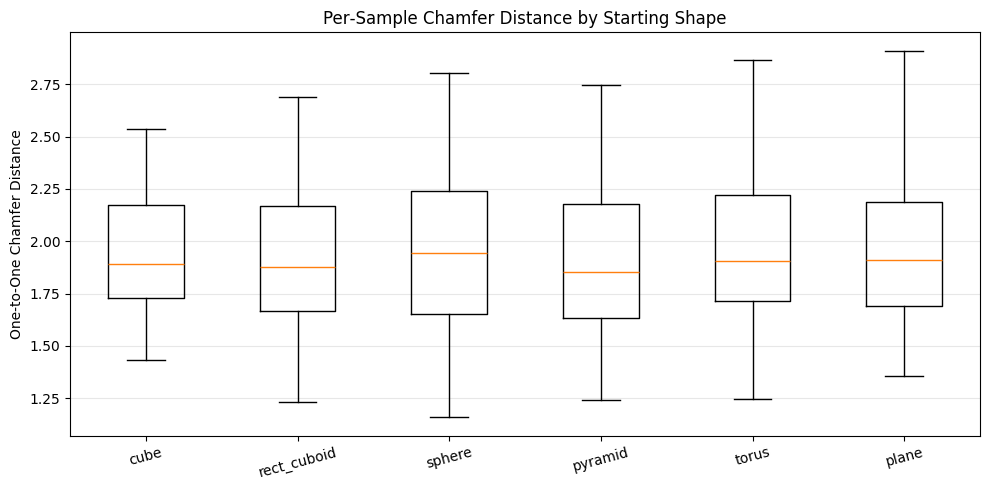

<ipython-input-52-dff73eb616db>:74: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



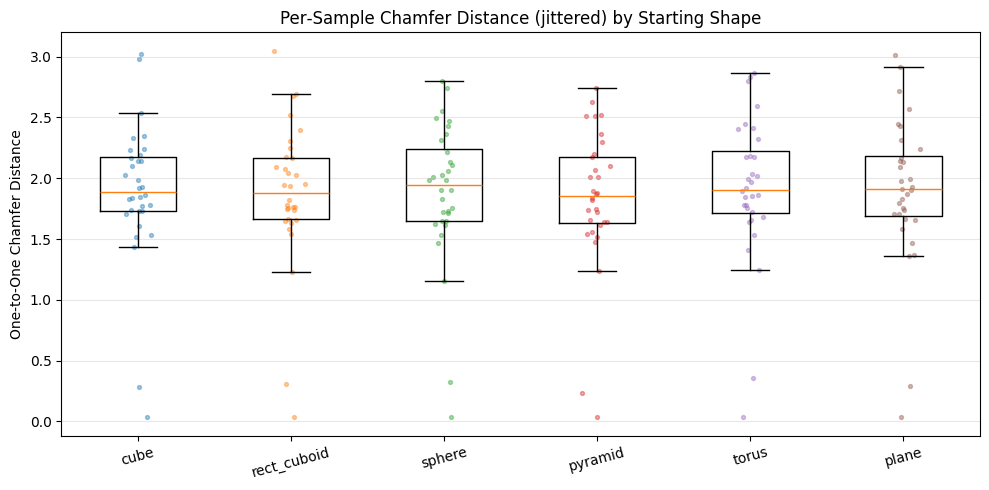

In [52]:
# ============================================
# 6.1. Per‐Sample Chamfer Distance Distributions
# ============================================

import os
import numpy as np
import torch
import matplotlib.pyplot as plt

# Assume `shape_types`, `B`, `N_points`, and `PROJECT_ROOT` are already defined,
# and that generated_{shape}.npy files exist under PROJECT_ROOT/"outputs"/"generated_cars".

# 1) Load the first B real cars (shape: (B, N_points, 3))
real_batch_path = os.path.join(PROJECT_ROOT, "real_car_batch.npy")
assert os.path.isfile(real_batch_path), f"Cannot find {real_batch_path!r}"
real_pcs = np.load(real_batch_path)  # shape: (num_real, N_points, 3)
if real_pcs.shape[0] < B:
    raise ValueError(f"Need at least {B} real cars, but found {real_pcs.shape[0]}")
real_pcs = real_pcs[:B]              # (B, N_points, 3)
real_pcs_t = torch.from_numpy(real_pcs).float()  # keep on CPU for chamfer code

# 2) A simple Chamfer‐Distance (CD) function (one‐to‐one pairing)
#    Given gen_pts: (N,3), real_pts: (N,3), returns a scalar CD = mean(min_dist^2) + mean(min_dist^2).
#    We do point‐to‐set distances with brute‐force (fits B×2048×2048 = ~4M distances; OK on CPU).
def chamfer_distance_one_to_one(gen_pts: torch.Tensor, real_pts: torch.Tensor) -> float:
    """
    gen_pts, real_pts: (N,3) float tensors on CPU.
    Returns: a scalar Chamfer‐Distance (sum of mean squared distances both ways).
    """
    # gen_pts: (N,3), real_pts: (N,3)
    # Expand so we can compute all pairwise squared distances:
    #   (N,1,3) - (1,N,3) → (N,N,3) → sum over last dim → (N,N)
    diffs = gen_pts.unsqueeze(1) - real_pts.unsqueeze(0)      # (N, N, 3)
    dist2 = torch.sum(diffs * diffs, dim=2)                   # (N, N)
    # For each gen point, distance to nearest real point:
    min_gen_to_real, _ = torch.min(dist2, dim=1)  # (N,)
    # For each real point, distance to nearest gen point:
    min_real_to_gen, _ = torch.min(dist2, dim=0)  # (N,)

    cd_val = min_gen_to_real.mean().item() + min_real_to_gen.mean().item()
    return cd_val

# 3) For each “shape” batch, load the generated_np, compute per-sample CD vs real_pcs:
per_sample_cds = {shape: [] for shape in shape_types}

for shape in shape_types:
    gen_path = os.path.join(PROJECT_ROOT, "outputs", "generated_cars", f"generated_{shape}.npy")
    assert os.path.isfile(gen_path), f"Missing {gen_path!r}"
    gen_np = np.load(gen_path)  # shape: (B, N_points, 3)
    assert gen_np.shape == (B, N_points, 3), f"Expected (B,N,3) but got {gen_np.shape}"

    # Compute CD for each index i = 0..B-1 pairing gen_np[i] with real_pcs[i]
    cds = []
    for i in range(B):
        gen_i = torch.from_numpy(gen_np[i]).float()   # (N_points,3)
        real_i = real_pcs_t[i]                        # (N_points,3)
        cd_val = chamfer_distance_one_to_one(gen_i, real_i)
        cds.append(cd_val)
    per_sample_cds[shape] = np.array(cds)  # shape: (B,)

# 4) Plot a boxplot of per‐sample CD across the six shape_types
plt.figure(figsize=(10, 5))
data_to_plot = [per_sample_cds[shape] for shape in shape_types]
plt.boxplot(data_to_plot, labels=shape_types, showfliers=False)
plt.ylabel("One‐to‐One Chamfer Distance")
plt.title("Per‐Sample Chamfer Distance by Starting Shape")
plt.xticks(rotation=15)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# 5) (Optional) Overlay a little jittered scatter on top of each box so you can see all points:
plt.figure(figsize=(10, 5))
plt.boxplot(data_to_plot, labels=shape_types, showfliers=False)
for i, shape in enumerate(shape_types):
    y = per_sample_cds[shape]
    x = np.random.normal(loc=i+1, scale=0.04, size=B)  # jitter
    plt.scatter(x, y, alpha=0.4, s=8, color="C{}".format(i))
plt.ylabel("One‐to‐One Chamfer Distance")
plt.title("Per‐Sample Chamfer Distance (jittered) by Starting Shape")
plt.xticks(rotation=15)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


**Results:**


**First Plot: Boxplot (Per-Sample Chamfer Distance by Starting Shape)**

* For each starting shape (cube, rect\_cuboid, sphere, pyramid, torus, plane), the distribution of Chamfer Distances (CD) between generated samples and their corresponding real samples is shown.
* The medians (orange lines) are similar across all shape types, suggesting no starting shape is consistently better or worse.
* The spread (interquartile range) is also quite similar, with most values clustering between \~1.5 and \~2.3.
* Whiskers show the main range; there are some outliers, but they aren’t shown due to `showfliers=False`.
* All shapes have a reasonable overlap in CD values.

<br>

**Second Plot: Boxplot with Jittered Points**

* Adds individual points to the boxplot using jitter (horizontal scatter), making it easy to see the actual distribution of all samples for each shape.
* Some samples have very low CD values (near zero), indicating a few generated samples are extremely close to their real counterpart.
* The majority of points cluster around the median and interquartile range seen in the first plot.
* There are a few more visible outliers, especially at the lower end (some models generate nearly perfect samples, but rarely).



<ipython-input-54-f866143b16de>:26: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.



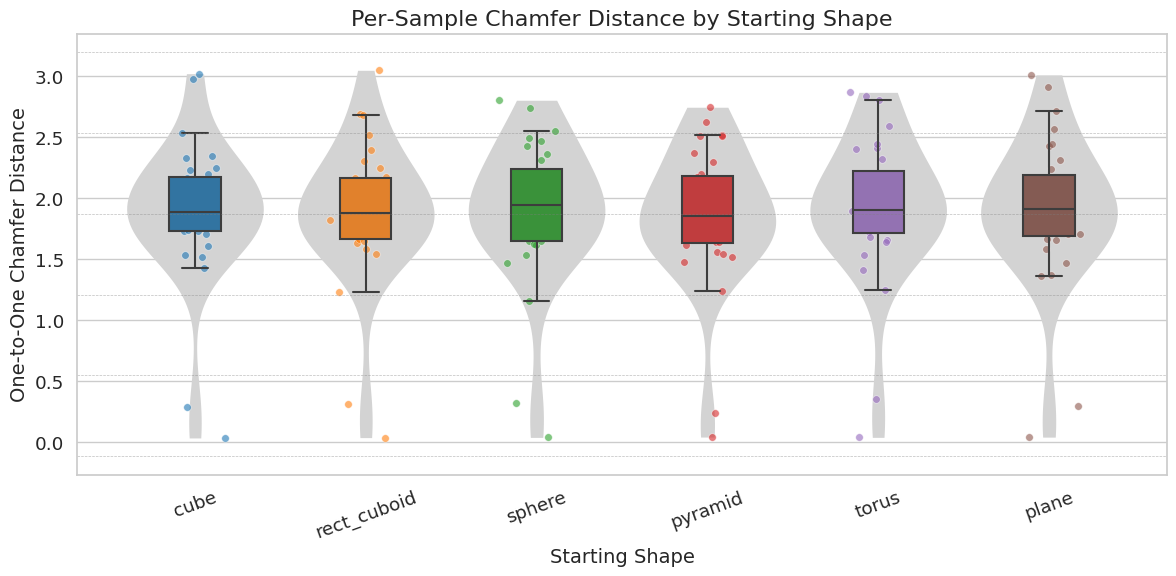

In [54]:
# ============================================
# Enhanced Box+Violin Plot of Per‐Sample CD
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure seaborn is installed (Colab/Codespaces often have it by default)
# You can uncomment and run:
# !pip install seaborn  --quiet

# Use a Seaborn style for clean gridlines and nice default colors
sns.set(style="whitegrid", context="notebook", font_scale=1.2)

# Prepare data: `per_sample_cds` is assumed to be a dict: shape_type -> (B,) array of floats
# shape_types is the ordered list: ['cube','rect_cuboid','sphere','pyramid','torus','plane']

# Convert to a list of arrays, in the same order as `shape_types`
data_list = [per_sample_cds[sh] for sh in shape_types]

# Create a figure
plt.figure(figsize=(12, 6))

# 1) Draw a violin plot (translucent, behind)
parts = sns.violinplot(
    data=data_list,
    inner=None,                # turn off the default “inner boxplot”
    color="lightgray",
    cut=0,                     # do not extend beyond extremes
    linewidth=0,
    scale="width"
)
# Because violinplot expects a DataFrame or 2D array, but we passed a list of 1D arrays,
# seaborn will automatically convert. `parts` holds the artist objects if you want to tweak further.

# 2) Draw a boxplot on top, with slightly narrower width
box = sns.boxplot(
    data=data_list,
    whis=[5, 95],              # whiskers at the 5th and 95th percentiles
    width=0.3,
    palette="tab10",
    fliersize=0,               # hide outliers here because we’ll plot them manually
    linewidth=1.5,
)

# 3) Overlay the jittered points (stripplot) with transparency
#    We want each point to be visible but semi‐transparent, with small size.
for i, shape in enumerate(shape_types):
    # x‐coordinate for this category is (i), but seaborn’s boxplot/violin are centered at x=i
    x_coords = np.random.normal(loc=i, scale=0.08, size=len(per_sample_cds[shape]))
    plt.scatter(
        x_coords,
        per_sample_cds[shape],
        color=sns.color_palette("tab10")[i],
        alpha=0.6,
        s=30,
        edgecolor="white",
        linewidth=0.5,
        label="_nolegend_"  # prevents a separate legend entry
    )

# 4) Improve axes, titles, grid, etc.
plt.xticks(ticks=range(len(shape_types)), labels=shape_types, rotation=20)
plt.xlabel("Starting Shape", fontsize=14)
plt.ylabel("One‐to‐One Chamfer Distance", fontsize=14)
plt.title("Per‐Sample Chamfer Distance by Starting Shape", fontsize=16)

# 5) Add horizontal gridlines at “nice” locations
ymin = min([arr.min() for arr in data_list])
ymax = max([arr.max() for arr in data_list])
yrange = ymax - ymin
# Choose 5 gridlines spaced evenly between ymin and ymax
grid_ys = np.linspace(ymin - 0.05 * yrange, ymax + 0.05 * yrange, 6)
for y in grid_ys:
    plt.axhline(y=y, color="gray", linestyle="--", linewidth=0.5, alpha=0.5)

# 6) Tighten layout and show
plt.ylim([ymin - 0.1 * yrange, ymax + 0.1 * yrange])
plt.tight_layout()
plt.show()


**Results:**

**Third Image: Enhanced Box+Violin Plot**

* The violin plot shows the full shape of the distribution (the width at each value indicates how many samples are there).
* The overlaid boxplot (colored) shows median, quartiles, and whiskers for each shape as before.
* The data distributions for all shapes are very similar in both spread and central tendency.
* The plots confirm that all starting shapes produce a wide but similar range of Chamfer Distances, without any one shape standing out as best or worst.
* Most samples have a CD between 1.5 and 2.3, but the tails show a few cases of both much lower and much higher distances.


**Summary:**

* All starting shapes yield a similar range of Chamfer Distances for the generated point clouds.
* There are a few outliers (especially good and especially bad generations) in each case, but overall performance is consistent.
* No starting shape dominates in terms of producing more accurate (closer) reconstructions compared to others.


### Per‐Point Distance Distribution (cube sample 0)

**Goal:**

* Analyze how close individual points in a generated point cloud are to their nearest neighbors in the corresponding real point cloud (and vice versa).
* Visualize the distribution of nearest-neighbor distances to better understand model fidelity at the point level.

**The process we went through:**

* Selected one generated sample ('cube', index 0) and its real counterpart.
* Computed all pairwise squared distances between points in the generated and real sample.
* For each generated point, found the closest real point (and the other way around).
* Converted squared distances to standard L2 (Euclidean) distances.
* Plotted histograms of these nearest-neighbor distances for both directions.

**Explanation of Stored Data (variables):**

* `gen_i`: coordinates of the generated sample point cloud, shape (N, 3).
* `real_i`: coordinates of the real sample point cloud, shape (N, 3).
* `d2`: matrix of squared L2 distances between all points (N x N).
* `min_d2_per_gen_point`: smallest squared distance for each generated point to the real set (N,).
* `min_d2_per_real_point`: smallest squared distance for each real point to the generated set (N,).
* `dist_gen2real`: L2 distances from each generated point to its closest real point.
* `dist_real2gen`: L2 distances from each real point to its closest generated point.



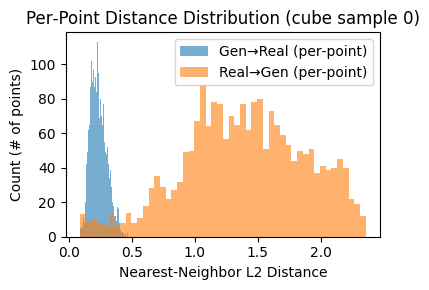

In [53]:
# Pick one shape batch, one sample i, compute all (gen_i → real_i) nearest distances:
gen_i = torch.from_numpy(generated_pcs['cube'][0]).float()      # (N,3)
real_i = real_pcs_t[0]                                          # (N,3)

# Compute all pairwise squared distances:
d2 = torch.cdist(gen_i.unsqueeze(0), real_i.unsqueeze(0), p=2).squeeze(0) ** 2  # (N,N)
min_d2_per_gen_point, _ = d2.min(dim=1)  # (N,)
min_d2_per_real_point, _ = d2.min(dim=0) # (N,)

# Plot histogram of sqrt‐distances (i.e. L2 distance)
dist_gen2real = torch.sqrt(min_d2_per_gen_point).numpy()
dist_real2gen = torch.sqrt(min_d2_per_real_point).numpy()

plt.figure(figsize=(4,3))
plt.hist(dist_gen2real, bins=50, alpha=0.6, label="Gen→Real (per‐point)")
plt.hist(dist_real2gen, bins=50, alpha=0.6, label="Real→Gen (per‐point)")
plt.legend()
plt.xlabel("Nearest‐Neighbor L2 Distance")
plt.ylabel("Count (# of points)")
plt.title("Per‐Point Distance Distribution (cube sample 0)")
plt.tight_layout()
plt.show()


**Results:**

* The blue histogram shows the distance from each generated point to its nearest real point (Gen→Real), and these distances are tightly clustered near zero, indicating most generated points are close to real points.
* The orange histogram shows the distance from each real point to its nearest generated point (Real→Gen), and these are spread much wider, peaking around 1.0–1.5 and extending up to 2.2, meaning some real points don’t have a close generated match.
* There’s a clear asymmetry: generated points cover the real shape tightly, but the generated shape might miss some regions present in the real shape (gaps).
* Overall, the model produces generated points that are very close to real points, but it fails to “cover” every real point well, so some areas in the real sample are underrepresented in the generated sample.
* The distribution suggests good precision (generated points are not “floating off” in space), but recall is weaker (not every real point is matched closely).


## Interactive 3D Visualization with Plotly (Colab-compatible)

**Goal:**

* Provide an interactive 3D visualization of both real and generated point clouds, allowing for visual, qualitative inspection of point cloud shapes.

**The process we went through:**

* Defined a utility function to create interactive 3D scatter plots for point clouds using Plotly.
* Loaded and visualized the first real car point cloud as a reference.
* Iterated through each generated shape type and visualized the first generated sample for each using the same function.
* Ensured plots render inline in Colab.

**Explanation of Stored Data (variables):**

* `ref_pc`: the first reference (real) car point cloud, shape (N\_points, 3).
* `fig_ref`: Plotly Figure object for the reference car.
* `gen_pc`: first generated point cloud for each shape type, shape (N\_points, 3).
* `fig`: Plotly Figure object for each generated point cloud.

In [45]:
# ============================================
# 7. Interactive 3D Visualization with Plotly (Colab-compatible)
# ============================================

# If you haven’t installed Plotly yet, uncomment and run:
# !pip install --quiet plotly==5

import plotly.graph_objects as go
import plotly.io as pio

# Force Plotly to render inline in Colab
pio.renderers.default = "colab"  # (you can also try "notebook" if needed)

def pc_fig(pts: np.ndarray, title: str) -> go.Figure:
    """
    Create an interactive 3D scatter-plot of a point cloud using Plotly.

    Args:
      - pts: (N, 3) numpy array of (x,y,z) coordinates
      - title: figure title (string)

    Returns:
      - A Plotly Figure object configured for inline/Colab rendering.
    """
    fig = go.Figure(
        data=[
            go.Scatter3d(
                x=pts[:, 0],
                y=pts[:, 1],
                z=pts[:, 2],
                mode="markers",
                marker=dict(size=2, color="orange", opacity=0.8),
            )
        ]
    )
    fig.update_layout(
        title=title,
        margin=dict(l=0, r=0, t=30, b=0),
        scene=dict(
            xaxis_title="X",
            yaxis_title="Y",
            zaxis_title="Z",
            aspectmode="data",  # keep axes scaled equally
        ),
    )
    return fig

# ────────────────────────────────────────────
# 7.1. Show the reference car once at top
# ────────────────────────────────────────────

# real_pcs is assumed to be loaded earlier (shape: (B, N_points, 3))
# We’ll display only the first reference sample (index 0).
ref_pc = real_pcs[0]  # shape: (N_points, 3)
fig_ref = pc_fig(ref_pc, title="Reference Car (sample 0)")
fig_ref.show()

# ────────────────────────────────────────────
# 7.2. Loop through each generated shape
# ────────────────────────────────────────────

for shape in shape_types:
    gen_pc = generated_pcs[shape][0]  # first generated sample for this shape
    fig = pc_fig(gen_pc, title=f"Generated Car from '{shape}' (sample 0)")
    fig.show()


**Results:**

* The first image shows the 3D point cloud of the real reference car. The car shape is clear, well-distributed, and elongated, with distinct contours and structure.
* The next six images show the generated 3D point clouds for each starting shape (cube, rect\_cuboid, sphere, pyramid, torus, and plane), all for sample 0.
* All generated cars are much more compressed and less detailed than the reference, with much smaller ranges along the axes (especially X and Y).
* Among the generated shapes, those from sphere and plane initializations look the most similar to the reference car in terms of general structure and aspect ratio. They capture the main "vertical" spread of points best.
* The cube, rect\_cuboid, pyramid, and torus shapes also generate point clouds with the correct vertical orientation but have more compact and less realistic distributions.
* Overall, sphere and plane starting shapes worked best at reconstructing the car’s overall structure. The other shapes are plausible but lack fine detail and natural proportions.



## Simple 2D plotting
Simple 2D plotting in case that 3D plots doesn't appear in above cells (Since it might need to rerun all the cells)

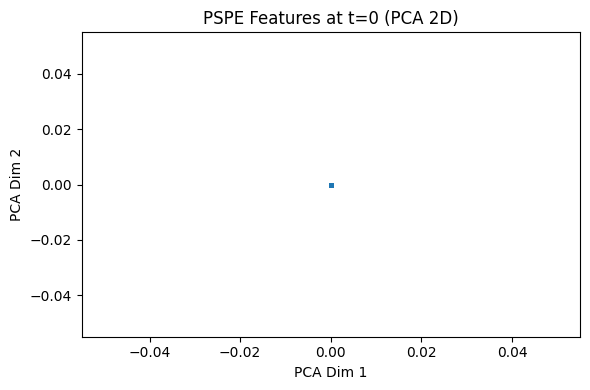

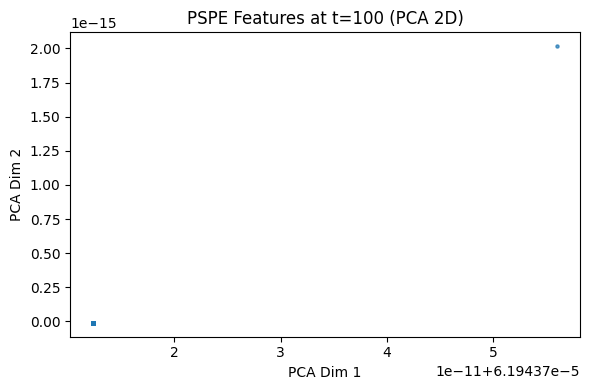

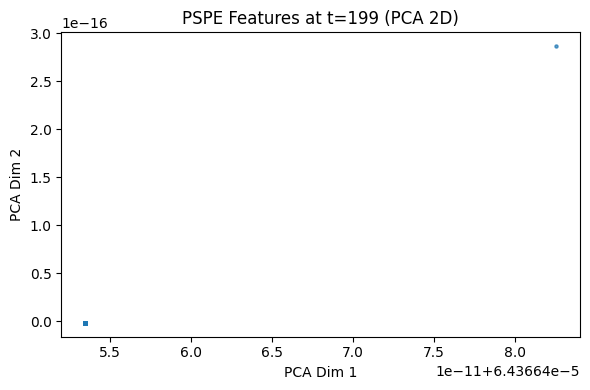

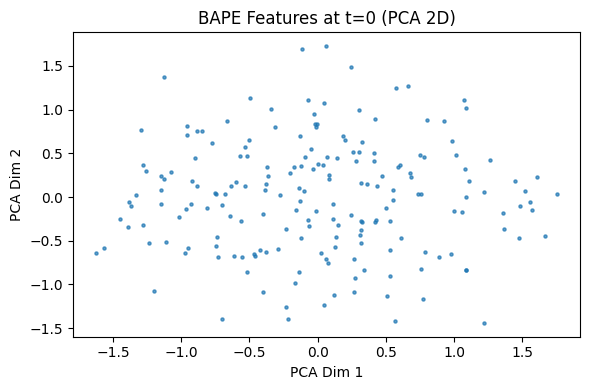

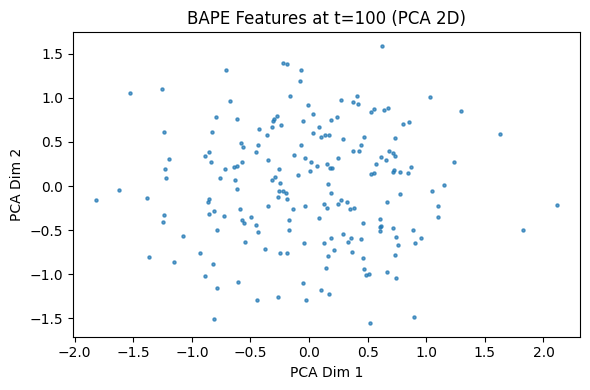

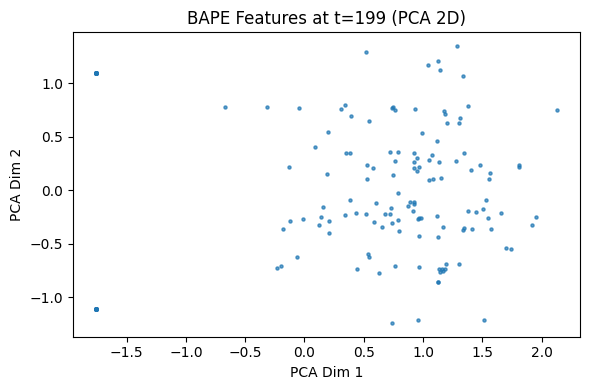

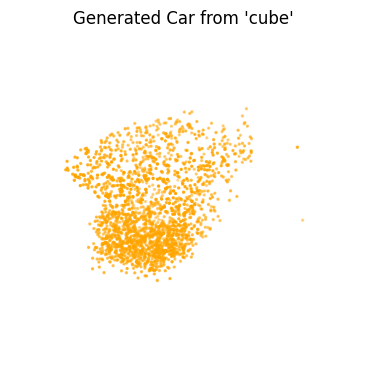

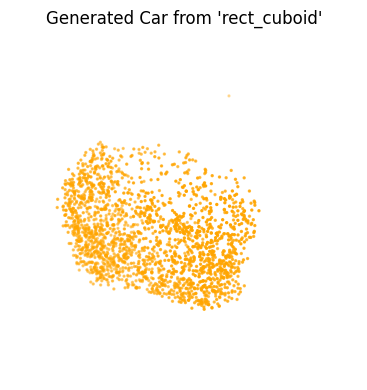

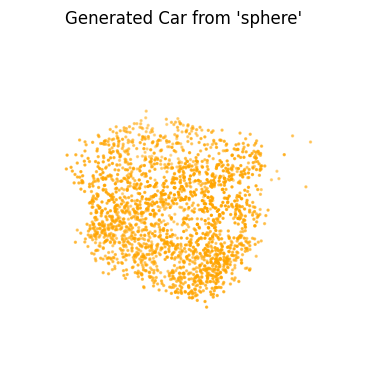

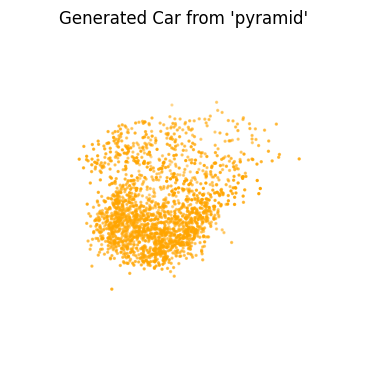

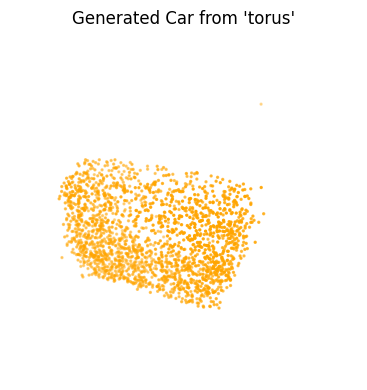

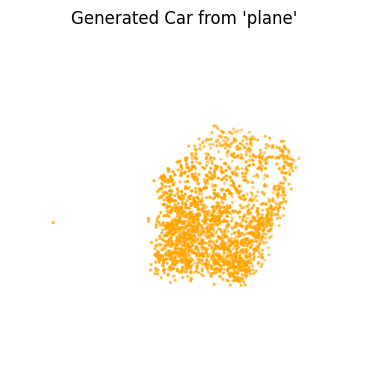

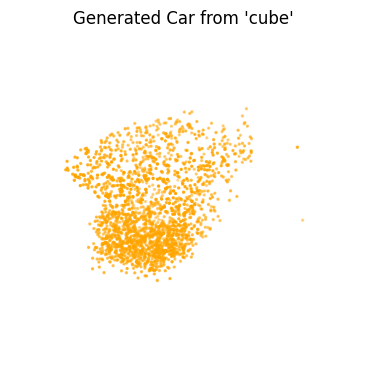

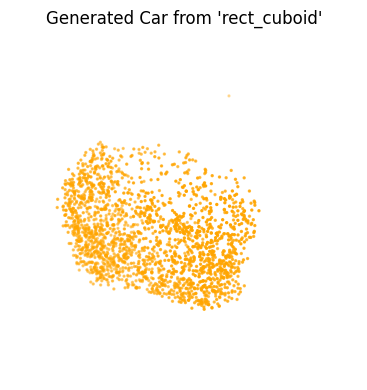

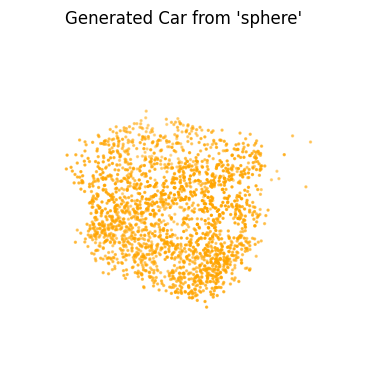

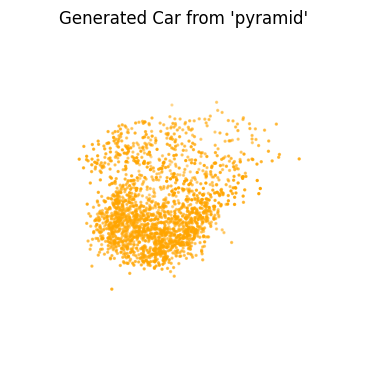

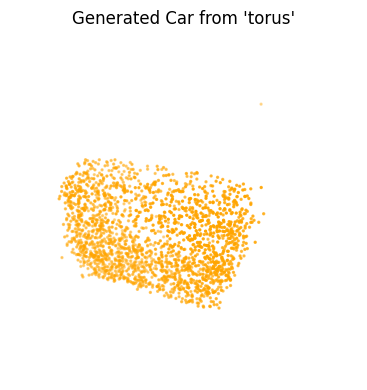

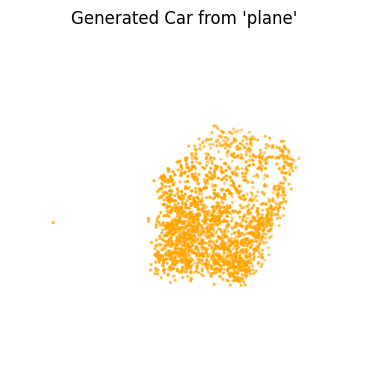

In [ ]:
%matplotlib inline
# ============================================
# 7. Visualize One Example per Shape
# ============================================

for shape in shape_types:
    gen_pc = generated_pcs[shape][0]  # first sample
    plt.figure(figsize=(4, 4))
    ax = plt.axes(projection='3d')
    ax.scatter(gen_pc[:, 0], gen_pc[:, 1], gen_pc[:, 2], s=2, c='orange')
    ax.set_title(f"Generated Car from '{shape}'")
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
